In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

from datetime import date

import seaborn as sns
import matplotlib.pyplot as plt

import glob

In [2]:
# Celda que me permite situar el directorio de ejecución según el ordenador donde esté trabajando:

import os

diractual = os.getcwd()
diractual

'/Users/Edicion/Library/CloudStorage/GoogleDrive-alex.vidal.bermudez@gmail.com/Mi unidad/Data Analytics/Sprint 10'

In [3]:
#Importamos los censos de locales comerciales del 2016, 2019, 2022, 2024

df_locales_2016 = pd.read_csv(r'../Sprint 10/Censo locales/2016_cens_locals_plantabaixa.csv', dtype={'ID_CCOMERC': str}) #En la columna 17 se mezclaban tipos int y str
df_locales_2016.head()

,ID_BCN,ID_PRINCIP,N_PRINCIP,ID_SECTOR,N_SECTOR,ID_GRUPACT,N_GRUPACT,ID_ACT,N_ACT,N_LOCAL,...,Nom_Barri,Codi_Districte,N_DISTRI,N_EIX,SN_EIX,SEC_CENS,Y_UTM_ETRS,X_UTM_ETRS,LATITUD,LONGITUD
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,...,el Barri Gòtic,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517


In [4]:
df_locales_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78033 entries, 0 to 78032
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_BCN          78033 non-null  int64  
 1   ID_PRINCIP      78033 non-null  int64  
 2   N_PRINCIP       78033 non-null  object 
 3   ID_SECTOR       78033 non-null  int64  
 4   N_SECTOR        78033 non-null  object 
 5   ID_GRUPACT      78033 non-null  int64  
 6   N_GRUPACT       78033 non-null  object 
 7   ID_ACT          78033 non-null  int64  
 8   N_ACT           78033 non-null  object 
 9   N_LOCAL         78033 non-null  object 
 10  SN_CARRER       78033 non-null  int64  
 11  SN_MERCAT       78033 non-null  int64  
 12  ID_MERCAT       78033 non-null  int64  
 13  N_MERCAT        78033 non-null  object 
 14  SN_GALERIA      78033 non-null  int64  
 15  N_GALERIA       78033 non-null  object 
 16  SN_CCOMERC      78033 non-null  int64  
 17  ID_CCOMERC      78033 non-null 

'DATA' está en formato str, ojo

In [5]:
#Añadimos al censo la columna Any e identificamos los registros con el año del censo actual (2016)

df_locales_2016['Any'] = 2016

In [6]:
df_locales_2016.columns.values

array(['ID_BCN', 'ID_PRINCIP', 'N_PRINCIP', 'ID_SECTOR', 'N_SECTOR',
       'ID_GRUPACT', 'N_GRUPACT', 'ID_ACT', 'N_ACT', 'N_LOCAL',
       'SN_CARRER', 'SN_MERCAT', 'ID_MERCAT', 'N_MERCAT', 'SN_GALERIA',
       'N_GALERIA', 'SN_CCOMERC', 'ID_CCOMERC', 'N_CCOMERC', 'N_CARRER',
       'NUM_POLICI', 'REF_CAD', 'DATA', 'Codi_Barri', 'Nom_Barri',
       'Codi_Districte', 'N_DISTRI', 'N_EIX', 'SN_EIX', 'SEC_CENS',
       'Y_UTM_ETRS', 'X_UTM_ETRS', 'LATITUD', 'LONGITUD', 'Any'],
      dtype=object)

In [7]:
# Renombramos las columnas para adaptarlas al formato de posteriores dataframes

df_locales_2016.rename(columns={'ID_BCN': 'ID_Bcn_2016', 'ID_PRINCIP': 'Codi_Principal_Activitat', 'N_PRINCIP': 'Nom_Principal_Activitat', 'ID_SECTOR': 'Codi_Sector_Activitat', 'N_SECTOR': 'Nom_Sector_Activitat',
       'ID_GRUPACT': 'Codi_Grup_Activitat', 'N_GRUPACT': 'Nom_Grup_Activitat', 'ID_ACT': 'Codi_Activitat_2016', 'N_ACT': 'Nom_Activitat_2016', 'N_LOCAL': 'Nom_Local',
       'SN_CARRER': 'SN_Carrer', 'SN_MERCAT': 'SN_Mercat', 'ID_MERCAT': 'Codi_Mercat', 'N_MERCAT': 'Nom_Mercat', 'SN_GALERIA': 'SN_Galeria',
       'N_GALERIA': 'Nom_Galeria', 'SN_CCOMERC': 'SN_CComercial', 'ID_CCOMERC': 'Codi_CComercial', 'N_CCOMERC': 'Nom_CComercial', 'N_CARRER': 'Nom_Via',
       'NUM_POLICI': 'Num_Policia_Inicial', 'REF_CAD': 'Referencia_Cadastral', 'DATA': 'Data_Revisio', 'N_DISTRI': 'Nom_Districte', 'N_EIX': 'Nom_Eix', 'SN_EIX': 'SN_Eix', 'SEC_CENS': 'Seccio_Censal',
       'Y_UTM_ETRS': 'Y_UTM_ETRS89', 'X_UTM_ETRS': 'X_UTM_ETRS89', 'LATITUD': 'Latitud', 'LONGITUD':'Longitud'}, inplace=True)

In [8]:
# Unificamos los códigos de actividad 0 y 2 y sus correspondientes valores, 'Sense activitat' (que solo aparece en el 2016) y 'Sense activitat Econòmica', para normalizarlo con los censos de años posteriores

df_locales_2016.loc[df_locales_2016['Nom_Principal_Activitat'] == 'Sense activitat', 'Nom_Principal_Activitat'] = 'Sense activitat Econòmica'
df_locales_2016.loc[df_locales_2016['Codi_Principal_Activitat'] == 2,['Codi_Principal_Activitat', 'Nom_Principal_Activitat']] = [0, 'Sense activitat Econòmica']

In [9]:
df_locales_2016.head()

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,Codi_Districte,Nom_Districte,Nom_Eix,SN_Eix,Seccio_Censal,Y_UTM_ETRS89,X_UTM_ETRS89,Latitud,Longitud,Any
0,49,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,1,Ciutat Vella,NaN,0,1030,4580750.861,431675.395,41.375377,2.182944,2016
1,50,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,...,1,Ciutat Vella,NaN,0,1030,4580752.167,431687.786,41.375390,2.183092,2016
2,51,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,...,1,Ciutat Vella,NaN,0,1030,4580753.613,431698.242,41.375404,2.183217,2016
3,52,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,...,1,Ciutat Vella,NaN,0,1030,4580755.360,431709.717,41.375420,2.183354,2016
4,53,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,...,1,Ciutat Vella,NaN,0,1030,4580755.700,431723.319,41.375425,2.183517,2016


In [10]:
#Importación del censo del 2019

df_locales_2019 = pd.read_csv(r'../Sprint 10/Censo locales/2019_censcomercialbcn_detall.csv', dtype={'Num_Policia_Final': str})
df_locales_2019.head()

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/159959838.py:3: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_locales_2019 = pd.read_csv(r'../Sprint 10/Censo locales/2019_censcomercialbcn_detall.csv', dtype={'Num_Policia_Final': str})


,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


In [11]:
#Unificación nombres columna

df_locales_2019.rename(columns={'Referencia_cadastral': 'Referencia_Cadastral'}, inplace=True)

In [12]:
#Añadimos al censo la columna Any e identificamos los registros con el año del censo actual (2019)

df_locales_2019['Any'] = 2019

In [13]:
df_locales_2019.columns.values

array(['ID_Bcn_2019', 'ID_Bcn_2016', 'Codi_Principal_Activitat',
       'Nom_Principal_Activitat', 'Codi_Sector_Activitat',
       'Nom_Sector_Activitat', 'Codi_Grup_Activitat',
       'Nom_Grup_Activitat', 'Codi_Activitat_2019', 'Nom_Activitat',
       'Codi_Activitat_2016', 'Nom_Local', 'SN_Oci_Nocturn',
       'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h',
       'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'Nom_Mercat', 'SN_Galeria',
       'Nom_Galeria', 'SN_CComercial', 'Nom_CComercial', 'SN_Eix',
       'Nom_Eix', 'X_UTM_ETRS89', 'Y_UTM_ETRS89', 'Latitud', 'Longitud',
       'Direccio_Unica', 'Codi_Via', 'Nom_Via', 'Planta', 'Porta',
       'Num_Policia_Inicial', 'Lletra_Inicial', 'Num_Policia_Final',
       'Lletra_Final', 'Solar', 'Codi_Parcela', 'Codi_Illa',
       'Seccio_Censal', 'Codi_Barri', 'Nom_Barri', 'Codi_Districte',
       'Nom_Districte', 'Referencia_Cadastral', 'Data_Revisio', 'Any'],
      dtype=object)

In [14]:
#Transponemos los valores de las siguientes columnas para unificarlos, ya que, en la elaboración del censo del 2019, han intercambiado los valores respecto el del 2016.

columnas =['SN_Oci_Nocturn', 'SN_Coworking', 'SN_Servei_Degustacio', 'SN_Obert24h', 'SN_Mixtura', 'SN_Carrer', 'SN_Mercat', 'SN_Galeria','SN_CComercial', 'SN_Eix']
df_locales_2019[columnas] = df_locales_2019[columnas] ^ 1

In [15]:
# Algunos cambios de formato en las columnas

df_locales_2019['Data_Revisio'] = pd.to_datetime(df_locales_2019['Data_Revisio'], format='%Y%m%d').dt.date
df_locales_2019[['Num_Policia_Inicial']] = df_locales_2019[['Num_Policia_Inicial']].astype(str)

In [16]:
#Importación del censo del 2022

df_locales_2022 = pd.read_csv(r'../Sprint 10/Censo locales/220930_censcomercialbcn_opendata_2022_v10_mod.csv',  dtype={'Num_Policia_Inicial': str, 'Num_Policia_Final': str})
df_locales_2022.head()

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/816118504.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_locales_2022 = pd.read_csv(r'../Sprint 10/Censo locales/220930_censcomercialbcn_opendata_2022_v10_mod.csv',  dtype={'Num_Policia_Inicial': str, 'Num_Policia_Final': str})


,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,2577e29a-b8d7-41f9-b751-49507d679c94,53938.0,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,574888.0,32.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272432DF3827C,2021-06-22
1,a2463c00-b817-408f-ad31-cf32c08ca00a,53941.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,159607.0,22.0,92670.0,47,60,Sant Andreu,9,Sant Andreu,2272422DF3827C,2021-06-22
2,47706876-da40-4fc8-b1dd-03730ca86205,53918.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,307364.0,8.0,92663.0,47,60,Sant Andreu,9,Sant Andreu,2272908DF3827A,2021-06-22
3,82c0708f-577b-4304-a7f2-6e3982a8935e,53964.0,1,Actiu,2,Serveis,9,Ensenyament,9000000,Ensenyament,...,142660.0,22.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173822DF3827C,2021-06-22
4,a3bd8a79-b4e8-4989-ad4b-ac6296701fec,53967.0,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,142661.0,23.0,92740.0,47,60,Sant Andreu,9,Sant Andreu,2173823DF3827C,2021-06-22


In [17]:
#Añadimos al censo la columna Any e identificamos los registros con el año del censo actual (2022)

df_locales_2022['Any'] = 2022

In [18]:
#Unificamos los valores de los campos que funcionan como booleanos con los valores de años anteriores

df_locales_2022[columnas] = df_locales_2022[columnas].replace({'Sí': 1, 'No': 0})

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/3763169899.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_locales_2022[columnas] = df_locales_2022[columnas].replace({'Sí': 1, 'No': 0})


In [19]:
#Importación del censo del 2024

df_locales_2024 = pd.read_csv(r'../Sprint 10/Censo locales/241021_censcomercialbcn_opendata_2024_v5.csv')
df_locales_2024.head()

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/687383201.py:3: DtypeWarning: Columns (10,19,35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df_locales_2024 = pd.read_csv(r'../Sprint 10/Censo locales/241021_censcomercialbcn_opendata_2024_v5.csv')


,ID_Global,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2022,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_Cadastral,Data_Revisio
0,5f158100-c0b8-45e2-8137-0294791bcbcf,45538.0,0,Sense activitat Econòmica,3,Locals buits en venda i lloguer,0,Grup no definit,30,Locals buits en venda i lloguer,...,115760.0,7.0,72524.0,57,16,la Bordeta,3,Sants-Montjuïc,8206307DF2880E,2023-05-16
1,03a89603-7bb5-423f-b8b5-27c0e2f3b17b,16649.0,0,Sense activitat Econòmica,3,Locals buits en venda i lloguer,0,Grup no definit,30,Locals buits en venda i lloguer,...,124307.0,7.0,6910.0,26,65,el Clot,10,Sant Martí,2249707DF3824G,2023-03-13
2,aad63dad-4969-4eff-88cc-514e9e959edd,23980.0,0,Sense activitat Econòmica,2,Locals buits en lloguer,0,Grup no definit,20,Locals buits en lloguer,...,87046.0,2.0,31130.0,81,27,el Putxet i el Farró,5,Sarrià-Sant Gervasi,9038702DF2893G,2023-07-05
3,59832baf-4dd3-4fa4-a2b1-140cdeb92c77,NaN,0,Sense activitat Econòmica,3,Locals buits en venda i lloguer,0,Grup no definit,30,Locals buits en venda i lloguer,...,141511.0,8.0,30130.0,87,27,el Putxet i el Farró,5,Sarrià-Sant Gervasi,8341508DF2884A,2023-07-07
4,e3794cd9-8191-4cb3-88bc-3332041a6f99,26849.0,0,Sense activitat Econòmica,3,Locals buits en venda i lloguer,0,Grup no definit,30,Locals buits en venda i lloguer,...,551851.0,31.0,30400.0,95,27,el Putxet i el Farró,5,Sarrià-Sant Gervasi,8051631DF2885A,2023-07-11


In [20]:
#Añadimos al censo la columna Any e identificamos los registros con el año del censo actual (2024)

df_locales_2024['Any'] = 2024

In [21]:
#Unificamos criteros de valores en los campos que funcionan como booleanos

df_locales_2024[columnas] = df_locales_2024[columnas].replace({'Si': 1, 'No': 0})

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/1094404405.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_locales_2024[columnas] = df_locales_2024[columnas].replace({'Si': 1, 'No': 0})


In [22]:
#Unimos los cuatro censos en un único dataframe

censos_locales = [df_locales_2016, df_locales_2019, df_locales_2022, df_locales_2024]
df_locales_2016_2024 = pd.concat(censos_locales)
df_locales_2016_2024.head()

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,Planta,Porta,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,ID_Global,Codi_Activitat_2022
0,49.0,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,INSIDE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50.0,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,KURTZ & GUT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,51.0,1,Actiu,1,Comerç al detall,4,Equipament personal,4003,Vestir,SPRINGFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52.0,1,Actiu,1,Comerç al detall,4,Equipament personal,4000,Calçat i pell,CASAS KIDS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53.0,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,BARITIMO LOUGE CLUB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Comprobamos si en el dataframe existe algún registro que identifique el local como 'Ús Habitatge':

df_locales_2016_2024.loc[(df_locales_2016_2024['Codi_Activitat_2016'] == '44') | (df_locales_2016_2024['Nom_Activitat_2016'] == 'Ús Habitatge') |
                                   (df_locales_2016_2024['Codi_Sector_Activitat'] == '*0000044') | (df_locales_2016_2024['Nom_Sector_Activitat'] == 'Ús Habitatge')]

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,Planta,Porta,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,ID_Global,Codi_Activitat_2022


In [24]:
# Otra forma más lenta, pero que te devuelve un valor, para realizar esta operación

df_locales_2016_2024.apply(lambda x: x['Codi_Activitat_2016'] == '44' or x['Nom_Activitat_2016'] == 'Ús Habitatge' or x['Codi_Sector_Activitat'] == '*0000044' or x['Nom_Sector_Activitat'] == 'Ús Habitatge', axis=1).sum()

0

In [25]:
# Vamos a quedarnos con los locales a pie de calle SN_Carrer == 1, que son los que nos interesan para este estudio

pie_calle = df_locales_2016_2024['SN_Carrer'] == 1
df_locales_2016_2024 = df_locales_2016_2024[pie_calle]
df_locales_2016_2024.head()

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,Planta,Porta,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,ID_Global,Codi_Activitat_2022
3121,4531.0,1,Actiu,2,Serveis,16,Altres,16006,Perruqueries,PERRUQUERIA ARAB OUSSMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3122,4532.0,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,PICARN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3123,4533.0,1,Actiu,3,Altres,17,Altres,17001,Administració,SUBINSPECCION GENERAL PIRINAICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3124,4534.0,1,Actiu,2,Serveis,15,Sanitat i assistència,15000,Sanitat i assistència,UNITAT DE MEDICINA TROPICAL I SALUT INTERNACIO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125,4535.0,1,Actiu,1,Comerç al detall,2,Quotidià no alimentari,2001,Drogueria i perfumeria,TOT PINTURA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Agrupamos el número locales por año, estado del local y distrito antes de sacar las gráficas

df_locales_2016_2024_agrupados = df_locales_2016_2024.groupby(['Any', 'Nom_Principal_Activitat', 'Nom_Districte']).size().reset_index()
df_locales_2016_2024_agrupados.columns = ['Año', 'Estado local', 'Distrito','Locales']
df_locales_2016_2024_agrupados

,Año,Estado local,Distrito,Locales
0,2016,Actiu,Ciutat Vella,5589
1,2016,Actiu,Eixample,13429
2,2016,Actiu,Gràcia,5143
3,2016,Actiu,Horta-Guinardó,4105
4,2016,Actiu,Les Corts,2565
...,...,...,...,...
75,2024,Sense activitat Econòmica,Nou Barris,448
76,2024,Sense activitat Econòmica,Sant Andreu,475
77,2024,Sense activitat Econòmica,Sant Martí,702
78,2024,Sense activitat Econòmica,Sants-Montjuïc,662


In [27]:
df_locales_2016_2024_agrupados.to_csv(r'../Sprint 10/Datos exportados/df_locales_2016_2024.csv')

Text(0, 0.5, 'Número de locales')

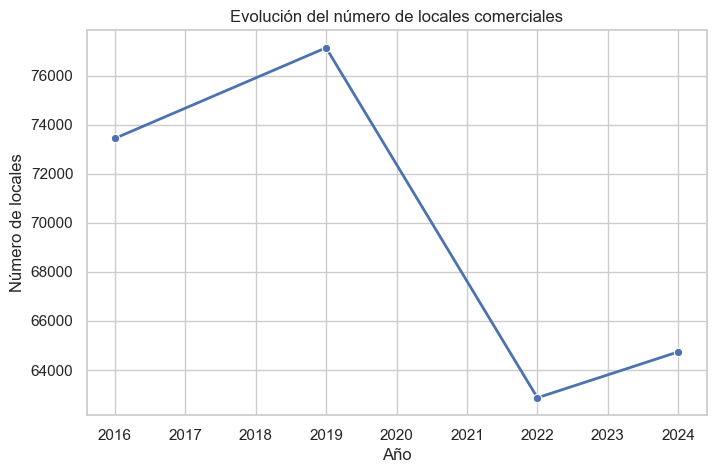

In [28]:
# Vamos a graficar la evolución del total los locales a pie de calle

df_locales_por_año = df_locales_2016_2024_agrupados.groupby('Año')['Locales'].sum().reset_index()

# Configuramos la plantilla de estilo de seaborn
sns.set_theme(style="whitegrid")

# Creamos la gráfica de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_locales_por_año, x='Año', y='Locales', marker='o', linewidth=2, errorbar=None)

# Personalizamos la gráfica
plt.title('Evolución del número de locales comerciales')
plt.xlabel('Año')
plt.ylabel('Número de locales')
# plt.xticks(df_locales_2016_2024_agrupados['Año'])  # Mostrar solo los años disponibles

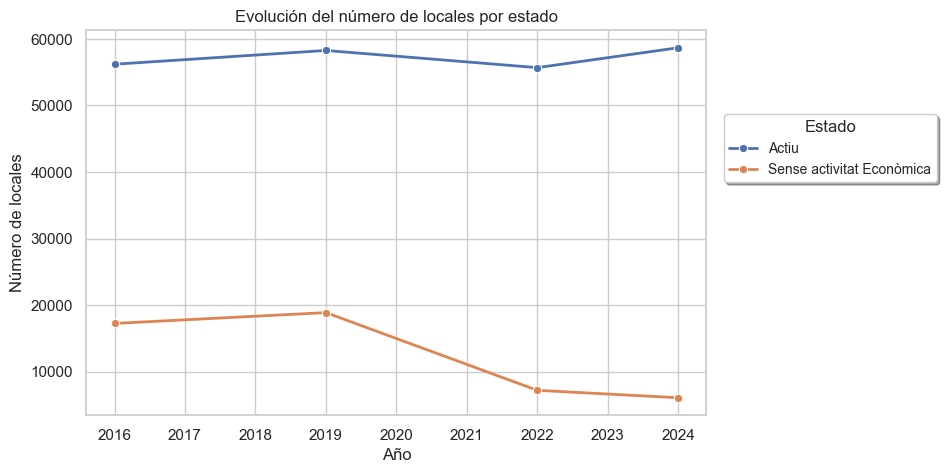

In [29]:
# Gráfica por estado
df_locales_por_estado = df_locales_2016_2024_agrupados.groupby(['Año', 'Estado local'])['Locales'].sum().reset_index()
df_locales_por_estado

# Crear gráfica de líneas, diferenciando por sector
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_locales_por_estado, x='Año', y='Locales', hue='Estado local', marker='o', linewidth=2, errorbar=None)

# Personalizar la gráfica
plt.title("Evolución del número de locales por estado")
plt.xlabel("Año")
plt.ylabel("Número de locales")
plt.legend(fontsize= 'small', loc='upper center', title='Estado', bbox_to_anchor=(1.2, 0.8), shadow=True, ncol=1)


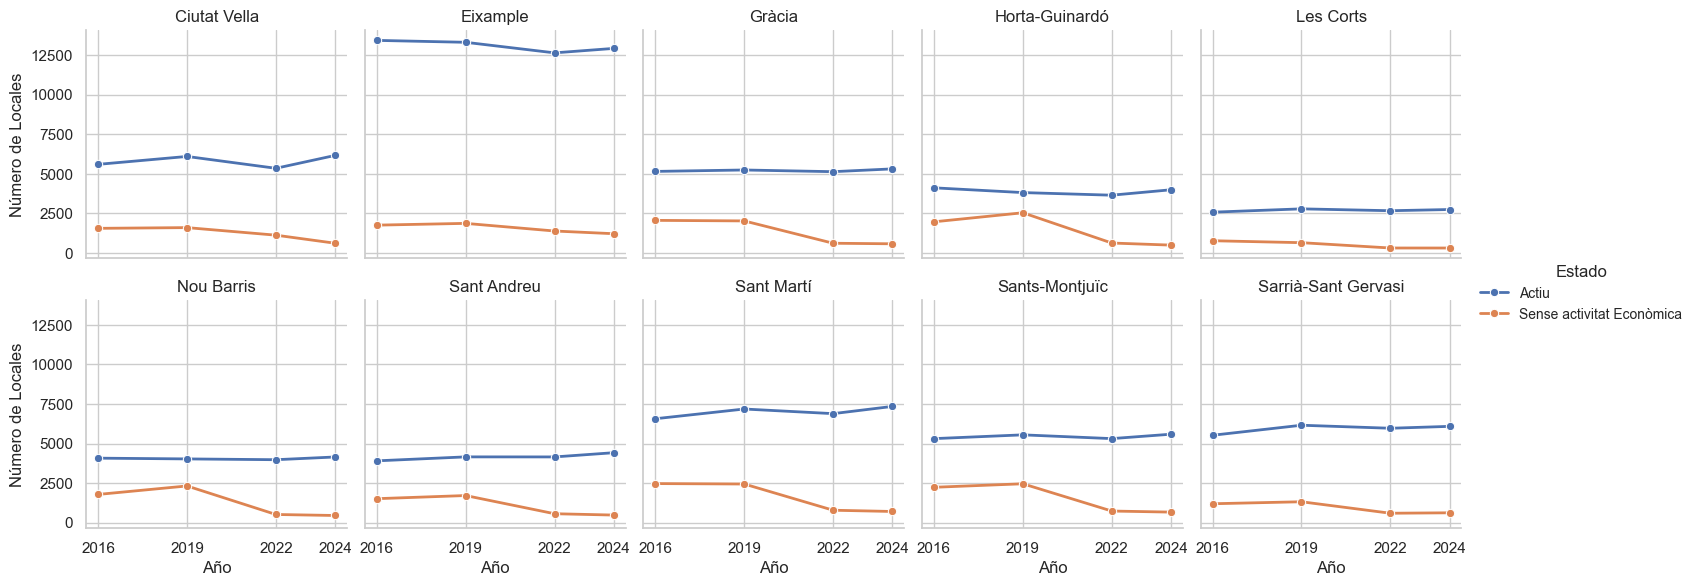

In [30]:
# Creamos un FacetGrid con la distribución por distritos
g = sns.FacetGrid(df_locales_2016_2024_agrupados, col='Distrito', col_wrap=5, sharey=True)

# Dibujar una línea en cada gráfico
g.map(sns.lineplot, 'Año', 'Locales', 'Estado local', marker='o', linewidth=2)

# Ajustar título y ejes
g.figure.subplots_adjust(top=0.94)
# g.figure.suptitle('Evolución de locales por distrito')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Número de Locales')

# Establecer los ticks del eje x para que muestren solo los años censados
años_unicos = df_locales_2016_2024_agrupados['Año'].unique()
for ax in g.axes.flat:
    ax.set_xticks(años_unicos)

# Añadir leyenda fuera de las gráficas individuales
g.add_legend(title='Estado', fontsize='small')

#plt.tight_layout()
plt.show()

In [31]:
# Vemos los valores
# locales_agrupados

In [32]:
# Calculamos las diferencias
#locales_agrupados['Diferencia'] = locales_agrupados['Locales'].diff()
#locales_agrupados['Porcentaje'] = round((locales_agrupados['Diferencia'] / locales_agrupados['Locales'].shift(1)) * 100, 2)

#locales_agrupados

In [33]:
# Contar locales por año y estado del local
#locales_agrupados_actividad = locales_comerciales_2016_2024.groupby(['Any', 'Nom_Principal_Activitat']).size().reset_index()
#locales_agrupados_actividad.columns = ['Año', 'Estado local', 'Locales']
#locales_agrupados_actividad

In [34]:
# Calculamos las diferencias por estado de actividad

#locales_agrupados_actividad['Diferencia'] = locales_agrupados_actividad.groupby('Estado local')['Locales'].diff()
#locales_agrupados_actividad['Porcentaje'] = round((locales_agrupados_actividad['Diferencia'] / locales_agrupados_actividad.groupby('Estado local')['Locales'].shift(1)) * 100, 2)

#locales_agrupados_actividad

### Cédulas de habitabilidad en locales comerciales

In [35]:
#Locales que han pasado a ser vivienda

df_cedulas_habitabilidad = pd.read_csv(r'../Sprint 10/Cédulas habitabilidad/Cedules_d_habitabilitat_20250302.csv')
df_cedulas_habitabilidad.head()

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/187499853.py:3: DtypeWarning: Columns (11,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cedulas_habitabilidad = pd.read_csv(r'../Sprint 10/Cédulas habitabilidad/Cedules_d_habitabilitat_20250302.csv')


,id_cedula,numero_cedula,referencia_cadastral,tipusVia,nomVia,numInici,numFinal,escala,bloc,pis,...,codi_ine,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,Latitud,Longitud,Georeferència
0,-473135721,CHB03178621074,3439718DF3833G0051AS,Passatge,Saladrigas,8.0,NaN,3,NaN,2,...,8019,70.50,En tramitació,07/07/2021,07/07/2046,27/05/2021,5.0,41.402312,2.203132,POINT (2.2031324814298934 41.40231184290285)
1,-1183321479,CHB05826718051,8743803DF2884D0001PZ,Ronda,General Mitre,214.0,NaN,NaN,NaN,2,...,8019,55.13,Atorgada,19/11/2018,19/11/2033,12/11/2018,2.0,41.405484,2.146351,POINT (2.146351078314585 41.405483603494)
2,-472244939,CHB00055022001,0840512DF3804B0053IB,Carrer,Sardenya,417.0,NaN,NaN,NaN,4,...,8019,65.05,Atorgada,15/03/2022,15/03/2037,06/01/2022,4.0,41.407695,2.167089,POINT (2.167089327289259 41.407694801812546)
3,-445433036,CHB04934922001,0309503DF3800G0029XT,Carrer,Aldana,6.0,NaN,NaN,NaN,5,...,8019,60.75,Atorgada,12/09/2022,12/09/2037,23/08/2022,4.0,41.375521,2.166191,NaN
4,-1184340047,CHB05146218001,0308812DF3800G0003JI,Carrer,Poeta Cabanyes,17.0,NaN,NaN,NaN,EN,...,8019,52.90,Atorgada,06/11/2018,06/11/2033,06/10/2018,2.0,41.374258,2.165884,POINT (2.1658843384377993 41.3742578750695)


In [36]:
# Adecuamos formato de la fecha de resolución (que es la que nos interesa) a date

df_cedulas_habitabilidad['data_resolucio'] = pd.to_datetime(df_cedulas_habitabilidad['data_resolucio'], format = '%d/%m/%Y')

# Y extraemos el año de la resolución en una nueva columna
df_cedulas_habitabilidad['any'] = df_cedulas_habitabilidad['data_resolucio'].dt.strftime('%Y')
df_cedulas_habitabilidad

,id_cedula,numero_cedula,referencia_cadastral,tipusVia,nomVia,numInici,numFinal,escala,bloc,pis,...,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,Latitud,Longitud,Georeferència,any
0,-473135721,CHB03178621074,3439718DF3833G0051AS,Passatge,Saladrigas,8.0,NaN,3,NaN,2,...,70.50,En tramitació,2021-07-07,07/07/2046,27/05/2021,5.0,41.402312,2.203132,POINT (2.2031324814298934 41.40231184290285),2021
1,-1183321479,CHB05826718051,8743803DF2884D0001PZ,Ronda,General Mitre,214.0,NaN,NaN,NaN,2,...,55.13,Atorgada,2018-11-19,19/11/2033,12/11/2018,2.0,41.405484,2.146351,POINT (2.146351078314585 41.405483603494),2018
2,-472244939,CHB00055022001,0840512DF3804B0053IB,Carrer,Sardenya,417.0,NaN,NaN,NaN,4,...,65.05,Atorgada,2022-03-15,15/03/2037,06/01/2022,4.0,41.407695,2.167089,POINT (2.167089327289259 41.407694801812546),2022
3,-445433036,CHB04934922001,0309503DF3800G0029XT,Carrer,Aldana,6.0,NaN,NaN,NaN,5,...,60.75,Atorgada,2022-09-12,12/09/2037,23/08/2022,4.0,41.375521,2.166191,NaN,2022
4,-1184340047,CHB05146218001,0308812DF3800G0003JI,Carrer,Poeta Cabanyes,17.0,NaN,NaN,NaN,EN,...,52.90,Atorgada,2018-11-06,06/11/2033,06/10/2018,2.0,41.374258,2.165884,POINT (2.1658843384377993 41.3742578750695),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701300,-446296757,CHB04497722001,3189614DF3838G0012TQ,Passeig,Santa Coloma,104.0,NaN,NaN,NaN,3,...,63.53,Atorgada,2022-08-04,04/08/2037,25/07/2022,5.0,41.448032,2.199136,NaN,2022
701301,-470363150,SLB01397222001,8192606DF2789C,Carrer,Mare de Déu de Port,281.0,289.0,A,NaN,BA,...,53.70,Atorgada,2022-08-01,01/08/2037,07/03/2022,4.0,41.359836,2.141186,NaN,2022
701302,-560954728,NaN,NaN,Gran Via,Carles III,46.0,NaN,M,NaN,BA,...,37.44,Fora de termini,NaT,NaN,22/01/2019,2.0,41.383250,2.128988,NaN,NaN
701303,-471321392,CHB00645722001,8209117DF2880G0001AE,Carrer,Gayarre,23.0,25.0,NaN,NaN,BA,...,55.60,Atorgada,2022-08-19,19/08/2037,26/01/2022,2.0,41.374438,2.140178,NaN,2022


In [37]:
# Limpiamos los registros sin año de resolución

df_cedulas_habitabilidad.dropna(subset='any', inplace=True)

In [38]:
# Cambiamos el formato del año

df_cedulas_habitabilidad['any'] = df_cedulas_habitabilidad['any'].astype(int)

In [39]:
#Vamos a quedarnos con las cédulas otorgadas a partir del 2016, y después intentaremos fijarnos en los locales

df_cedulas_habitabilidad = df_cedulas_habitabilidad[(df_cedulas_habitabilidad['any'] >= 2016) & (df_cedulas_habitabilidad['any'] <= 2024) & (df_cedulas_habitabilidad['estat_cedula'] == 'Atorgada')]
df_cedulas_habitabilidad

,id_cedula,numero_cedula,referencia_cadastral,tipusVia,nomVia,numInici,numFinal,escala,bloc,pis,...,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,Latitud,Longitud,Georeferència,any
1,-1183321479,CHB05826718051,8743803DF2884D0001PZ,Ronda,General Mitre,214.0,NaN,NaN,NaN,2,...,55.13,Atorgada,2018-11-19,19/11/2033,12/11/2018,2.0,41.405484,2.146351,POINT (2.146351078314585 41.405483603494),2018
2,-472244939,CHB00055022001,0840512DF3804B0053IB,Carrer,Sardenya,417.0,NaN,NaN,NaN,4,...,65.05,Atorgada,2022-03-15,15/03/2037,06/01/2022,4.0,41.407695,2.167089,POINT (2.167089327289259 41.407694801812546),2022
3,-445433036,CHB04934922001,0309503DF3800G0029XT,Carrer,Aldana,6.0,NaN,NaN,NaN,5,...,60.75,Atorgada,2022-09-12,12/09/2037,23/08/2022,4.0,41.375521,2.166191,NaN,2022
4,-1184340047,CHB05146218001,0308812DF3800G0003JI,Carrer,Poeta Cabanyes,17.0,NaN,NaN,NaN,EN,...,52.90,Atorgada,2018-11-06,06/11/2033,06/10/2018,2.0,41.374258,2.165884,POINT (2.1658843384377993 41.3742578750695),2018
5,-471432797,CHB00484122001,1623304DF3812D0004PB,Carrer,Comerç,4.0,NaN,NaN,NaN,1,...,54.29,Atorgada,2022-04-01,01/04/2037,28/01/2022,4.0,41.389484,2.181098,POINT (2.1810976747085937 41.389484470829466),2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701298,-446325782,CHB04444222001,1143513DF3814C0017IO,Carrer,Padilla,271.0,NaN,NaN,NaN,4,...,69.30,Atorgada,2022-08-01,01/08/2037,21/07/2022,3.0,41.406228,2.175965,NaN,2022
701299,-446229580,CHB04678522001,2566107DF3826F0009EM,Carrer,Berenguer de Palou,123.0,127.0,NaN,NaN,3,...,73.50,Atorgada,2022-09-06,06/09/2037,01/08/2022,6.0,41.426510,2.191418,NaN,2022
701300,-446296757,CHB04497722001,3189614DF3838G0012TQ,Passeig,Santa Coloma,104.0,NaN,NaN,NaN,3,...,63.53,Atorgada,2022-08-04,04/08/2037,25/07/2022,5.0,41.448032,2.199136,NaN,2022
701301,-470363150,SLB01397222001,8192606DF2789C,Carrer,Mare de Déu de Port,281.0,289.0,A,NaN,BA,...,53.70,Atorgada,2022-08-01,01/08/2037,07/03/2022,4.0,41.359836,2.141186,NaN,2022


In [40]:
# cedulas_habitabilidad_2016_2024.dropna(subset='pis', inplace=True)

In [41]:
altura_locales = [ '0.',
 'B',
 'B.',
 'B1',
 'BA (PO)',
 'BA (SSOT)',
 'BA (SSOT.)',
 'BA - ENT',
 'BA - ESQ.',
 'BA -1',
 'BA 1',
 'BA 2',
 'BA EX',
 'BA EXT',
 'BA IN',
 'BA INT',
 'BA INT.',
 'BA(PO)',
 'BA+ALTELL',
 'BA- IN.3',
 'BA- INT.',
 'BA-1',
 'BA-2',
 'BA-3',
 'BA-EX',
 'BA-EXT',
 'BA-IN',
 'BA-INT',
 'BA-INT.',
 'BA-INT. 2',
 'BA. INT.',
 'BA/-1',
 'BA3',
 'BAIX INT',
 'BAIXOS 1',
 'BAIXOS 2',
 'BAIXOS 3',
 'BAIXOS 5',
 'BAIXOS INT',
 'BAJOS 3ER',
 'BI',
 'BX 2',
 'BX INT',
 'BX-INFERIO',
 'BX. INT.',
 'BX3',
 'INT BA-2',
 'INT-1',
 'INTERIOR',
 'L',
 'LC',
 'LO',
 'LOCAL',
 'P.BAIXA',
 'PB INF',
 'PBJ',
 'PBJ02',
 'S- SOTERRA',
 'S-1',
 'S-2',
 'S.SOB.ÀTIC',
 'S.SOT',
 'S.SOT.',
 'S.SOTAN',
 'S/SOTANO',
 'SEMI SOT',
 'SEMI SOT.',
 'SEMI SOTAN',
 'SEMI SOTER',
 'SEMISOT',
 'SEMISOT-1',
 'SEMISOT.',
 'SEMISOTAN',
 'SEMISOTANO',
 'SEMISOTE.',
 'SEMISOTER.',
 'SEMISÒTAN',
 'SEMISÓTANO',
 'SM',
 'SM-2',
 'SM-BX',
 'SOT',
 'SOT -1',
 'SOT -2',
 'SOT -3',
 'SOT 1',
 'SOT 2',
 'SOT 3',
 'SOT 5',
 'SOT TD6',
 'SOT-1',
 'SOT-2',
 'SOT-2 INT.',
 'SOT-3',
 'SOT-5',
 'SOT.',
 'SOT. (-1)',
 'SOT. -1',
 'SOT. -2',
 'SOT. 1',
 'SOT. 2',
 'SOT. 3PL.',
 'SOT.1',
 'SOT1',
 'SOT2',
 'SOTAN -2',
 'SOTANO 2',
 'SOTER. -2',
 'SOTERRANI',
 'SS',
 'SS -2',
 'SS1',
 'SSOT',
 'SSOT 1',
 'SSOT(BX-2)',
 'SSOT-1',
 'SSOT-BX',
 'SSOT.',
 'SST',
 'SST-2',
 'SSÓT',
 'ST',
 'ST -1',
 'ST -2',
 'ST 1',
 'ST 2',
 'ST.',
 'ST.3',
 'ST1',
 'ST2',
 'SUBSOT',
 'SÒTAN -1',
 'SÓT 1º',
 'SÓT-1']

In [42]:
df_cedulas_habitabilidad_locales = df_cedulas_habitabilidad[df_cedulas_habitabilidad['pis'].isin(altura_locales)]
df_cedulas_habitabilidad_locales.dropna(subset='Latitud', inplace=True)
df_cedulas_habitabilidad_locales

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/1397087432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cedulas_habitabilidad_locales.dropna(subset='Latitud', inplace=True)


,id_cedula,numero_cedula,referencia_cadastral,tipusVia,nomVia,numInici,numFinal,escala,bloc,pis,...,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,Latitud,Longitud,Georeferència,any
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,NaN,NaN,BA-1,...,35.56,Atorgada,2022-04-26,26/04/2037,26/03/2022,1.0,41.421623,2.145858,POINT (2.1458584004694417 41.42162312227477),2022
504,-413971730,CHB05282223001,9665524DF2896F0007PF,Carrer,Tolrà,33.0,NaN,NaN,NaN,SSOT,...,47.71,Atorgada,2023-10-19,19/10/2038,15/09/2023,4.0,41.425963,2.156891,NaN,2023
776,-389125138,CHB01226024001,8661338DF2886B0002JG,Carrer,Fastenrath,55.0,NaN,NaN,NaN,SOT -1,...,68.34,Atorgada,2024-04-12,12/04/2039,23/02/2024,7.0,41.422156,2.145007,NaN,2024
1864,-439768685,CHB01308823001,7509803DF2870H0001KI,Carrer,Sant Medir,16.0,NaN,NaN,NaN,SOT,...,45.20,Atorgada,2023-05-26,26/05/2038,01/03/2023,2.0,41.374615,2.132775,NaN,2023
2753,-472156559,CHB00218622001,8661827DF2886B0001PF,Carrer,Castellbisbal,49.0,NaN,NaN,NaN,ST,...,47.45,Atorgada,2022-03-07,07/03/2037,17/01/2022,2.0,41.423228,2.146280,POINT (2.1462795592295723 41.42322847542129),2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574245,-561855057,CHB06357218001,9237601DF2893E0004WB,Carrer,Sant Marc,19.0,21.0,NaN,NaN,LO,...,49.40,Atorgada,2019-02-07,07/02/2034,05/12/2018,2.0,41.400541,2.152530,POINT (2.1525302590047684 41.400541211162555),2019
574279,-561879173,SLB06424018001,8661328DF2886B0004WJ,Carrer,Fastenrath,79.0,NaN,NaN,NaN,SS,...,49.81,Atorgada,2019-04-01,01/04/2034,10/12/2018,1.0,41.422445,2.146200,POINT (2.1462001771277195 41.422444976882105),2019
574379,-561908933,CHB06341718001,1406101DF3910E0035RX,Carrer,Agudes,58.0,NaN,B,NaN,SEMISOT.,...,55.00,Atorgada,2019-01-08,08/01/2034,04/12/2018,4.0,41.463152,2.178616,POINT (2.1786163577705207 41.463152163498535),2019
701156,-445579916,CHB04704422001,9056701DF2895E0007ZA,Carrer,Pau Ferran,22.0,24.0,NaN,NaN,ST,...,51.60,Atorgada,2022-09-21,21/09/2037,02/08/2022,3.0,41.417034,2.150271,NaN,2022


In [43]:
#Creamos una columna nueva que calcule la geometría a partir de latitud y longitud:

df_cedulas_habitabilidad_locales['Georeferència'] = df_cedulas_habitabilidad_locales.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis = 1)

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/2812716861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cedulas_habitabilidad_locales['Georeferència'] = df_cedulas_habitabilidad_locales.apply(lambda row: Point(row['Longitud'], row['Latitud']), axis = 1)


In [44]:
df_cedulas_habitabilidad_locales.rename(columns={'Georeferència': 'geometria'}, inplace=True)

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/4274664096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cedulas_habitabilidad_locales.rename(columns={'Georeferència': 'geometria'}, inplace=True)


In [45]:
#Convertimos el dataframe en un geodataframe

df_cedulas_habitabilidad_locales_gdf = gpd.GeoDataFrame(df_cedulas_habitabilidad_locales, geometry='geometria', crs='EPSG:4326')
df_cedulas_habitabilidad_locales_gdf

,id_cedula,numero_cedula,referencia_cadastral,tipusVia,nomVia,numInici,numFinal,escala,bloc,pis,...,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,Latitud,Longitud,geometria,any
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,NaN,NaN,BA-1,...,35.56,Atorgada,2022-04-26,26/04/2037,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2022
504,-413971730,CHB05282223001,9665524DF2896F0007PF,Carrer,Tolrà,33.0,NaN,NaN,NaN,SSOT,...,47.71,Atorgada,2023-10-19,19/10/2038,15/09/2023,4.0,41.425963,2.156891,POINT (2.15689 41.42596),2023
776,-389125138,CHB01226024001,8661338DF2886B0002JG,Carrer,Fastenrath,55.0,NaN,NaN,NaN,SOT -1,...,68.34,Atorgada,2024-04-12,12/04/2039,23/02/2024,7.0,41.422156,2.145007,POINT (2.14501 41.42216),2024
1864,-439768685,CHB01308823001,7509803DF2870H0001KI,Carrer,Sant Medir,16.0,NaN,NaN,NaN,SOT,...,45.20,Atorgada,2023-05-26,26/05/2038,01/03/2023,2.0,41.374615,2.132775,POINT (2.13278 41.37461),2023
2753,-472156559,CHB00218622001,8661827DF2886B0001PF,Carrer,Castellbisbal,49.0,NaN,NaN,NaN,ST,...,47.45,Atorgada,2022-03-07,07/03/2037,17/01/2022,2.0,41.423228,2.146280,POINT (2.14628 41.42323),2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574245,-561855057,CHB06357218001,9237601DF2893E0004WB,Carrer,Sant Marc,19.0,21.0,NaN,NaN,LO,...,49.40,Atorgada,2019-02-07,07/02/2034,05/12/2018,2.0,41.400541,2.152530,POINT (2.15253 41.40054),2019
574279,-561879173,SLB06424018001,8661328DF2886B0004WJ,Carrer,Fastenrath,79.0,NaN,NaN,NaN,SS,...,49.81,Atorgada,2019-04-01,01/04/2034,10/12/2018,1.0,41.422445,2.146200,POINT (2.1462 41.42244),2019
574379,-561908933,CHB06341718001,1406101DF3910E0035RX,Carrer,Agudes,58.0,NaN,B,NaN,SEMISOT.,...,55.00,Atorgada,2019-01-08,08/01/2034,04/12/2018,4.0,41.463152,2.178616,POINT (2.17862 41.46315),2019
701156,-445579916,CHB04704422001,9056701DF2895E0007ZA,Carrer,Pau Ferran,22.0,24.0,NaN,NaN,ST,...,51.60,Atorgada,2022-09-21,21/09/2037,02/08/2022,3.0,41.417034,2.150271,POINT (2.15027 41.41703),2022


In [46]:
#Importamos el mapa de distritos, barrios y unidades administrativas de Barcelona para segmentar el registro de cédulas por distrito mediante la función sjoin de Geopandas

url = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'

df_districtes = gpd.read_file(url)

df_districtes

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.13629 41.42363, 2.1364 41.42358, 2..."
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.15949 41.44977, 2.15942 41.4496, 2..."
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [47]:
#Nos quedamos solo con las columnas correspondientes a los distritos

df_districtes = df_districtes[['NOM', 'geometry']]
df_districtes

,NOM,geometry
0,Ciutat Vella,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,Eixample,"POLYGON ((2.1869 41.40165, 2.18689 41.40087, 2..."
2,Sants-Montjuïc,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,Les Corts,"POLYGON ((2.10342 41.4011, 2.10352 41.40109, 2..."
4,Sarrià-Sant Gervasi,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."
5,Gràcia,"POLYGON ((2.13629 41.42363, 2.1364 41.42358, 2..."
6,Horta-Guinardó,"POLYGON ((2.15949 41.44977, 2.15942 41.4496, 2..."
7,Nou Barris,"POLYGON ((2.18706 41.46772, 2.18711 41.46711, ..."
8,Sant Andreu,"POLYGON ((2.18764 41.46212, 2.18765 41.46208, ..."
9,Sant Martí,"POLYGON ((2.20736 41.42711, 2.20698 41.42665, ..."


In [48]:
df_districtes.to_csv(r'../Sprint 10/Datos exportados/df_districtes.csv')

In [49]:
df_cedulas_habitabilidad_locales_gdf = gpd.sjoin(df_cedulas_habitabilidad_locales_gdf, df_districtes, how='left', predicate='within')

In [50]:
# Contar viviendas por año y distrito.
df_viviendas_agrupadas = df_cedulas_habitabilidad_locales_gdf.groupby(['any', 'NOM']).size().reset_index()
df_viviendas_agrupadas.columns = ['Año', 'Distrito', 'Licencias']
df_viviendas_agrupadas

,Año,Distrito,Licencias
0,2016,Ciutat Vella,2
1,2016,Eixample,6
2,2016,Gràcia,10
3,2016,Horta-Guinardó,46
4,2016,Les Corts,3
...,...,...,...
72,2024,Nou Barris,17
73,2024,Sant Andreu,2
74,2024,Sant Martí,2
75,2024,Sants-Montjuïc,1


In [51]:
# Nos percatamos de que hay años en los que no se ha otorgado ninguna licencia en algún distrito. Queremos que nos aparezca un cero, así que crearemos una tabla con todas las combinaciones de año y distrito y haremos un merge

años = df_cedulas_habitabilidad_locales_gdf['any'].unique()
distritos = df_cedulas_habitabilidad_locales_gdf['NOM'].unique()

# Crear un DataFrame con todas las combinaciones posibles
multi_index = pd.MultiIndex.from_product([años, distritos], names=['Año', 'Distrito'])
df_base = pd.DataFrame(index=multi_index)

# Hacer un merge con el DataFrame base para incluir los ceros
df_viviendas_agrupadas = df_base.merge(df_viviendas_agrupadas, on=['Año', 'Distrito'], how='left').fillna(0)

# Convertir la columna 'Licencias' a entero
df_viviendas_agrupadas['Licencias'] = df_viviendas_agrupadas['Licencias'].astype(int)


In [52]:
df_viviendas_agrupadas = df_viviendas_agrupadas.sort_values(by=['Año', 'Distrito'])
df_viviendas_agrupadas

,Año,Distrito,Licencias
74,2016,Ciutat Vella,2
73,2016,Eixample,6
75,2016,Gràcia,10
70,2016,Horta-Guinardó,46
79,2016,Les Corts,3
...,...,...,...
22,2024,Nou Barris,17
28,2024,Sant Andreu,2
27,2024,Sant Martí,2
21,2024,Sants-Montjuïc,1


Text(0, 0.5, 'Cantidad')

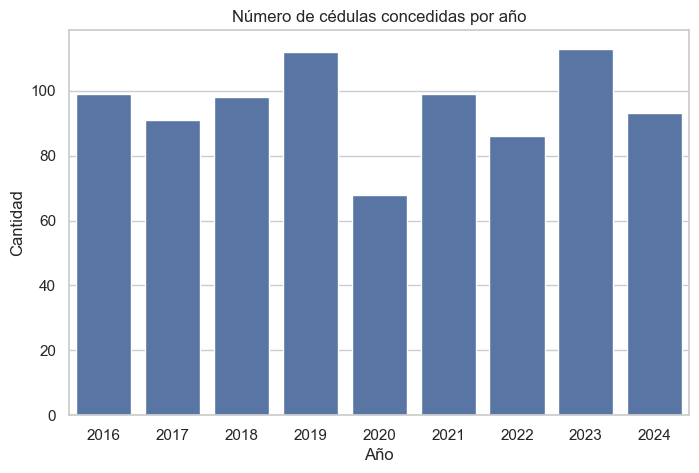

In [53]:
df_cedulas = df_viviendas_agrupadas.groupby('Año')['Licencias'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_cedulas, x='Año', y='Licencias', errorbar=None)

# Personalizar la gráfica
plt.title("Número de cédulas concedidas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
# plt.xticks(locales_agrupados['Año'])  # Mostrar solo los años disponibles

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/1132596522.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Distrito")


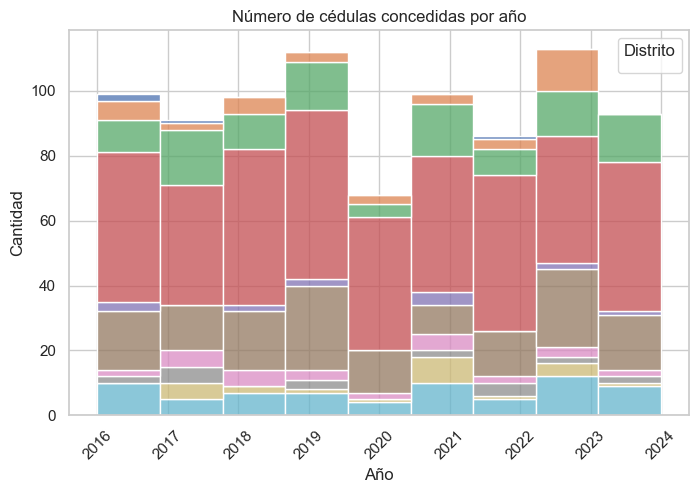

In [54]:
# Otra forma de representarlo mediante histograma con stacks

plt.figure(figsize=(8, 5))
sns.histplot(data=df_viviendas_agrupadas, x='Año', weights='Licencias', hue='Distrito', multiple='stack', bins=9)

# Personalizar la gráfica
plt.title("Número de cédulas concedidas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.legend(title="Distrito")
# plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


In [55]:
df_viviendas_agrupadas['Total'] = df_viviendas_agrupadas.groupby('Distrito')['Licencias'].cumsum()
df_viviendas_agrupadas

,Año,Distrito,Licencias,Total
74,2016,Ciutat Vella,2,2
73,2016,Eixample,6,6
75,2016,Gràcia,10,10
70,2016,Horta-Guinardó,46,46
79,2016,Les Corts,3,3
...,...,...,...,...
22,2024,Nou Barris,17,153
28,2024,Sant Andreu,2,29
27,2024,Sant Martí,2,20
21,2024,Sants-Montjuïc,1,23


Text(0, 0.5, 'Viviendas')

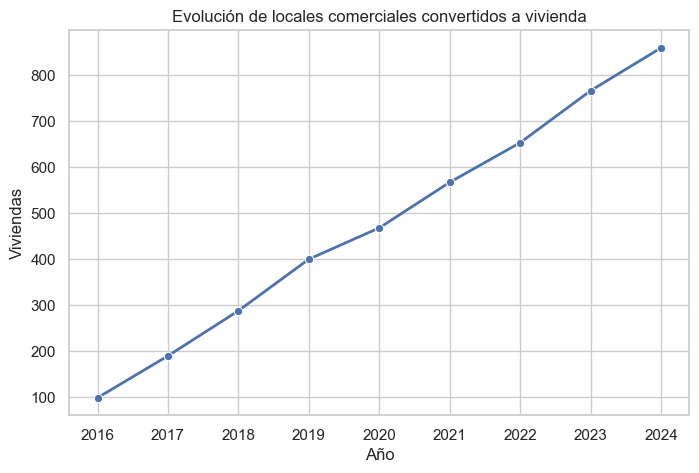

In [56]:
df_viviendas_acumuladas = df_viviendas_agrupadas.groupby('Año')['Total'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_viviendas_acumuladas, x='Año', y='Total', marker='o', linewidth=2, errorbar=None)

# Personalizar la gráfica
plt.title("Evolución de locales comerciales convertidos a vivienda")
plt.xlabel("Año")
plt.ylabel("Viviendas")

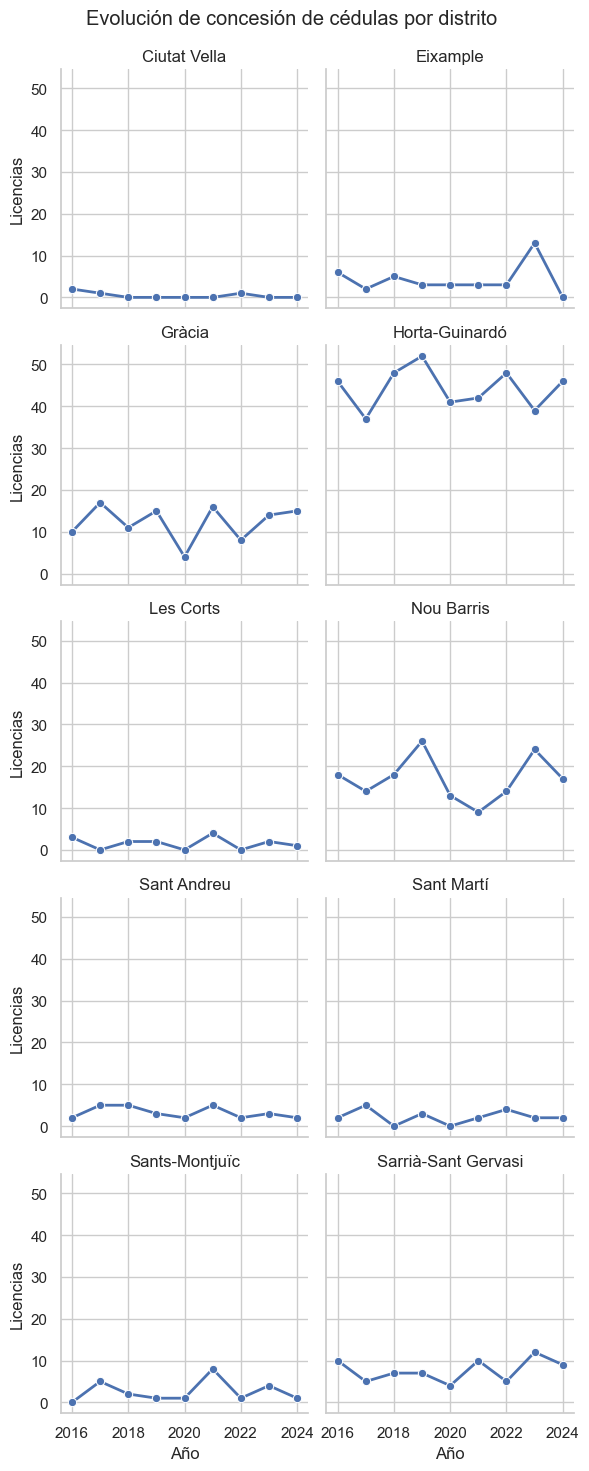

In [57]:
# Crear FacetGrid con una gráfica por distrito
g = sns.FacetGrid(df_viviendas_agrupadas, col='Distrito', col_wrap=2, sharey=True)

g.map(sns.lineplot, 'Año', 'Licencias', marker='o', linewidth=2)

# Título y ejes
g.figure.subplots_adjust(top=0.94)
g.figure.suptitle('Evolución de concesión de cédulas por distrito')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Licencias')


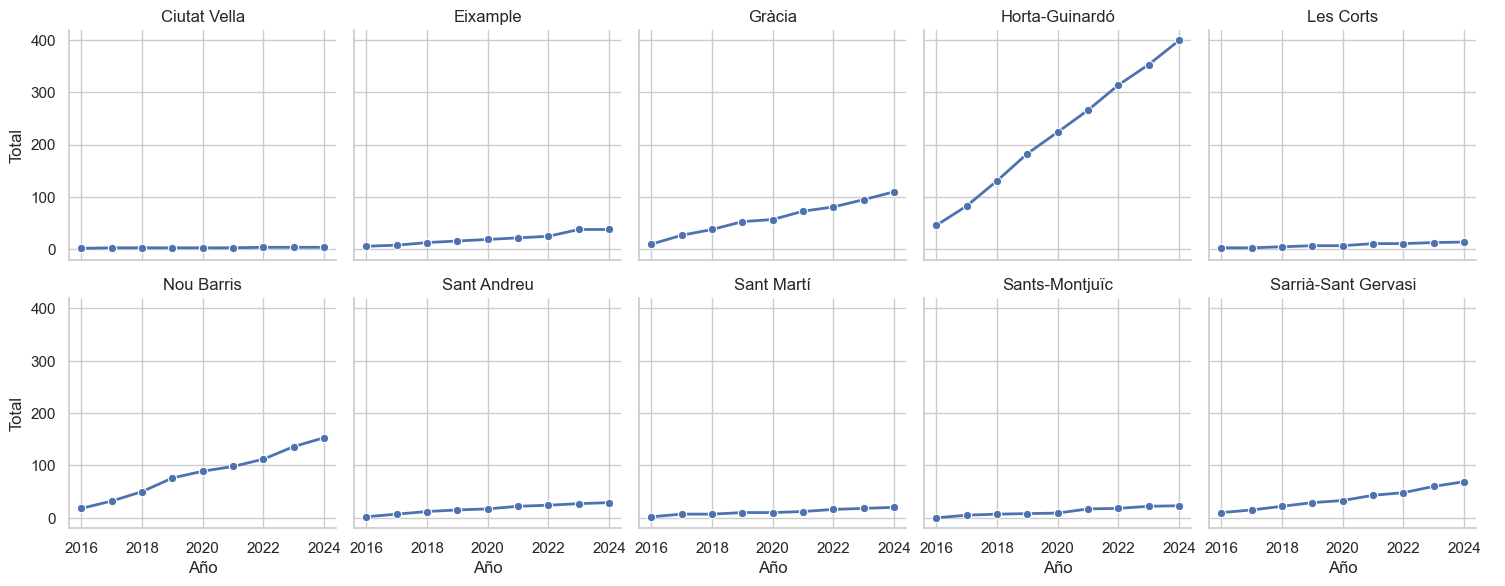

In [58]:
# Crear FacetGrid con una gráfica por distrito
g = sns.FacetGrid(df_viviendas_agrupadas, col='Distrito', col_wrap=5, sharey=True)

# Dibujar una línea en cada gráfico
g.map(sns.lineplot, 'Año', 'Total', marker='o', linewidth=2)

# Ajustar título y ejes
g.figure.subplots_adjust(top=0.94)
# g.figure.suptitle('Censo de locales transformados en vivienda')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Total')

# Añadir leyenda fuera de las gráficas individuales
g.add_legend()

In [59]:
# Exportamos el dataframe para tratar en Power BI

df_viviendas_agrupadas.to_csv(r'../Sprint 10/Datos exportados/df_viviendas_agrupadas.csv')

#### Unimos censo locales y viviendas a pie de calle

In [60]:
# Vamos a unificar nombres de columnas y a unir los recuentos de locales y viviendas para dar una visión global
df_viviendas_agrupadas.rename(columns= {'Total': 'Locales'}, inplace=True)
df_viviendas_agrupadas['Estado local'] = 'Habitatge'


In [61]:
df_viviendas_agrupadas = df_viviendas_agrupadas.loc[:, ['Año', 'Estado local', 'Distrito', 'Locales']]
df_viviendas_agrupadas


,Año,Estado local,Distrito,Locales
74,2016,Habitatge,Ciutat Vella,2
73,2016,Habitatge,Eixample,6
75,2016,Habitatge,Gràcia,10
70,2016,Habitatge,Horta-Guinardó,46
79,2016,Habitatge,Les Corts,3
...,...,...,...,...
22,2024,Habitatge,Nou Barris,153
28,2024,Habitatge,Sant Andreu,29
27,2024,Habitatge,Sant Martí,20
21,2024,Habitatge,Sants-Montjuïc,23


In [62]:
df_locales_viviendas = pd.concat([df_locales_2016_2024_agrupados, df_viviendas_agrupadas])
df_locales_viviendas

,Año,Estado local,Distrito,Locales
0,2016,Actiu,Ciutat Vella,5589
1,2016,Actiu,Eixample,13429
2,2016,Actiu,Gràcia,5143
3,2016,Actiu,Horta-Guinardó,4105
4,2016,Actiu,Les Corts,2565
...,...,...,...,...
22,2024,Habitatge,Nou Barris,153
28,2024,Habitatge,Sant Andreu,29
27,2024,Habitatge,Sant Martí,20
21,2024,Habitatge,Sants-Montjuïc,23


In [63]:
df_locales_viviendas.to_csv(r'../Sprint 10/Datos exportados/df_locales_viviendas.csv')

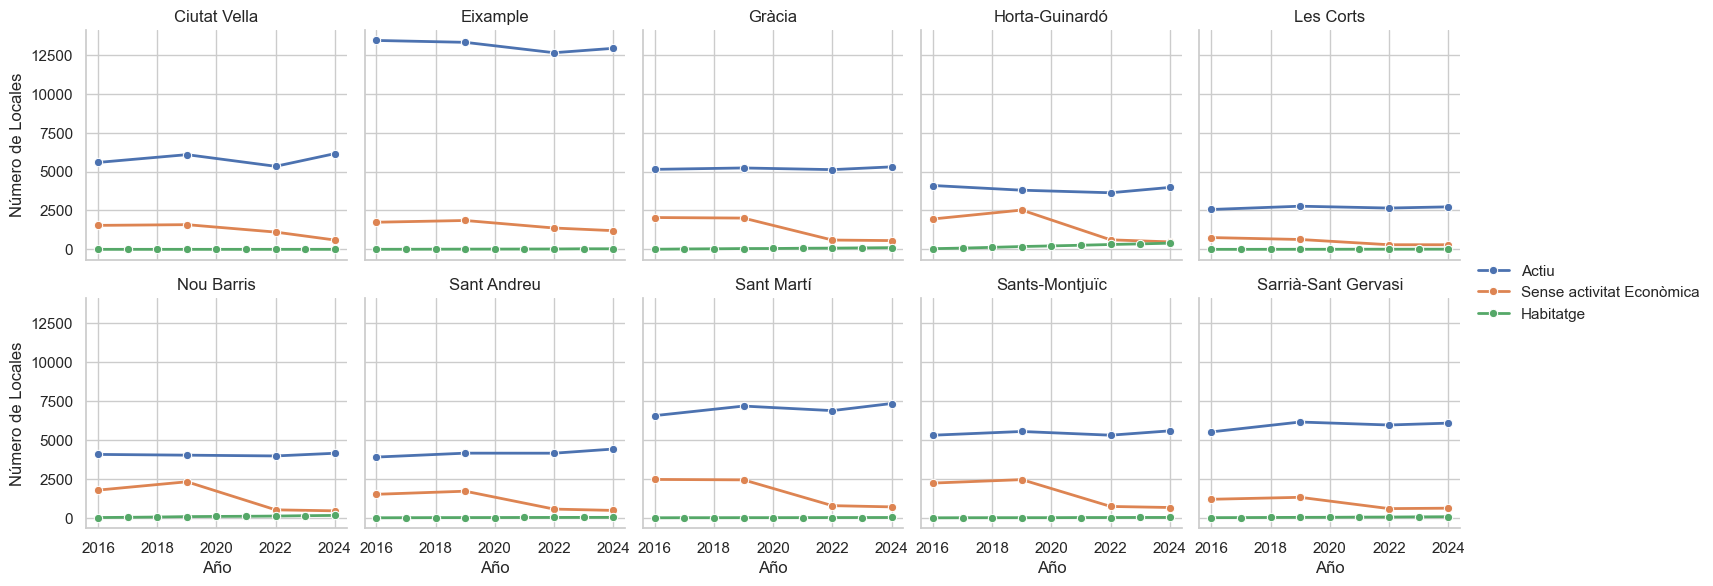

In [64]:
# FacetGrid
g = sns.FacetGrid(df_locales_viviendas, col='Distrito', col_wrap=5, sharey=True)

# Dibujar una línea en cada gráfico
g.map(sns.lineplot, 'Año', 'Locales', 'Estado local', marker='o', linewidth=2)

# Ajustar título y ejes
g.figure.subplots_adjust(top=0.94)
# g.figure.suptitle('Censo de locales y viviendas a pie de calle')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Número de Locales')

# Establecer los ticks del eje x para que muestren solo los años censados
#años_unicos = [2016, 2018, 2020, 2022, 2024]
#for ax in g.axes.flat:
#    ax.set_xticks(años_unicos)

# g.set_xticklabels(rotation=45) DESAPARECEN LOS XTICKS CUANDO SE INTENTAN ROTAR
# Añadir leyenda fuera de las gráficas individuales
g.add_legend()

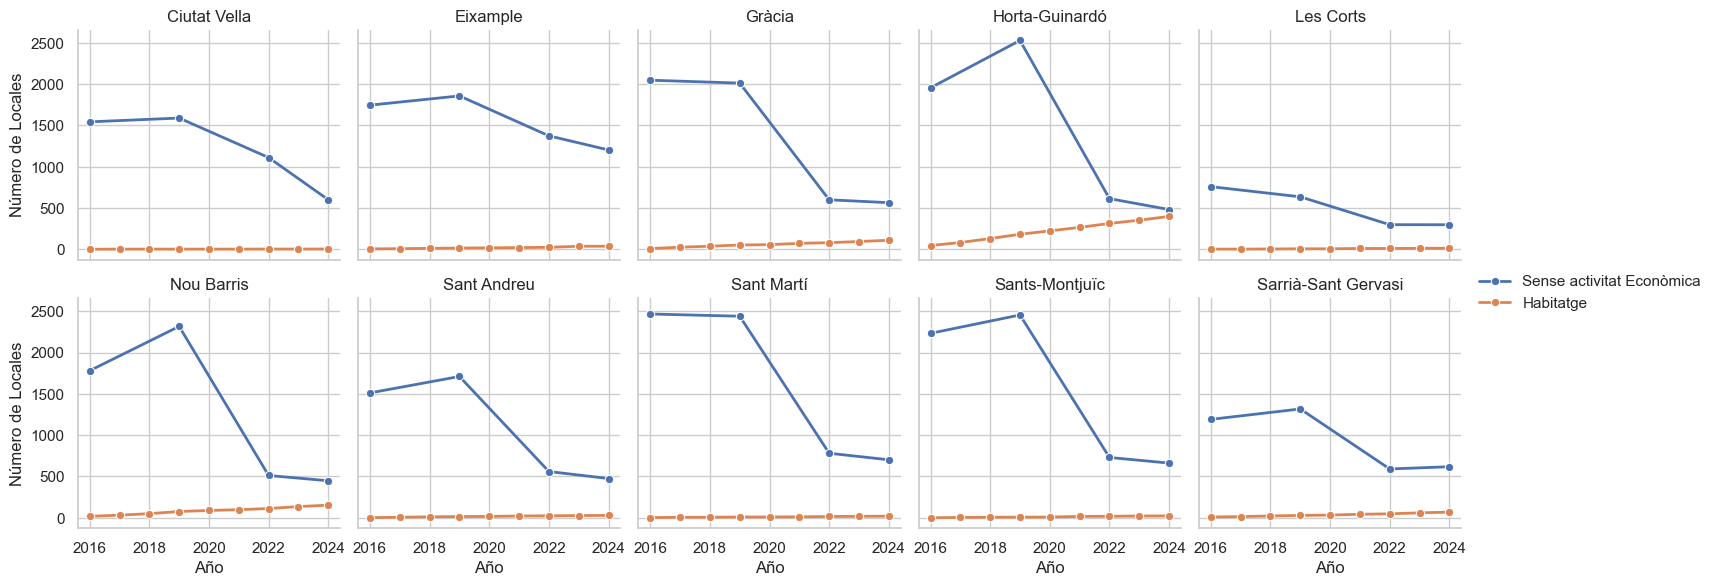

In [65]:
# Crear FacetGrid con una gráfica por distrito
g = sns.FacetGrid(df_locales_viviendas.loc[df_locales_viviendas['Estado local'] != 'Actiu'], col='Distrito', col_wrap=5, sharey=True)

# Dibujar una línea en cada gráfico
g.map(sns.lineplot, 'Año', 'Locales', 'Estado local', marker='o', linewidth=2)

# Ajustar título y ejes
g.figure.subplots_adjust(top=0.94)
#g.figure.suptitle('Locales inactivos vs viviendas')
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Número de Locales')

# Establecer los ticks del eje x para que muestren solo los años censados
años_unicos = [2016, 2018, 2020, 2022, 2024]
for ax in g.axes.flat:
    ax.set_xticks(años_unicos)
#    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# g.set_xticklabels(rotation=45) DESAPARECEN LOS XTICKS CUANDO SE INTENTAN ROTAR
# Añadir leyenda fuera de las gráficas individuales
g.add_legend()

In [66]:
# Vamos a por el mapa
# fig, ax = plt.subplots(figsize=(10, 8))
# districtes.plot(ax=ax, color="lightgrey", edgecolor="black", alpha=0.5)

In [67]:
#Convertimos el censo de locales a geopandas

df_locales_2016_2024_gdf = gpd.GeoDataFrame(df_locales_2016_2024, geometry=gpd.points_from_xy(df_locales_2016_2024.Latitud, df_locales_2016_2024.Longitud), crs="EPSG:4326")
df_locales_2016_2024_gdf

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,Porta,Lletra_Inicial,Num_Policia_Final,Lletra_Final,Solar,Codi_Parcela,Codi_Illa,ID_Global,Codi_Activitat_2022,geometry
3121,4531.0,1,Actiu,2,Serveis,16,Altres,16006,Perruqueries,PERRUQUERIA ARAB OUSSMAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (41.37657 2.16932)
3122,4532.0,1,Actiu,2,Serveis,14,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,PICARN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (41.37672 2.19018)
3123,4533.0,1,Actiu,3,Altres,17,Altres,17001,Administració,SUBINSPECCION GENERAL PIRINAICA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (41.37664 2.17785)
3124,4534.0,1,Actiu,2,Serveis,15,Sanitat i assistència,15000,Sanitat i assistència,UNITAT DE MEDICINA TROPICAL I SALUT INTERNACIO...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (41.3766 2.17289)
3125,4535.0,1,Actiu,1,Comerç al detall,2,Quotidià no alimentari,2001,Drogueria i perfumeria,TOT PINTURA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (41.3766 2.17157)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68019,76297.0,1,Actiu,1,Comerç al detall,3,Parament de la llar,7002,NaN,ANTIGUITATS MOYANO,...,10.0,NaN,209,NaN,127441.0,11.0,5120.0,5db9de22-cd87-472c-8588-4e844d093c27,7002000.0,POINT (41.40553 2.18386)
68020,72761.0,1,Actiu,1,Comerç al detall,3,Parament de la llar,7002,NaN,MONEDALIA,...,10.0,NaN,392,NaN,114345.0,3.0,40530.0,91be9d9b-9b03-41d6-b00f-7fcd2a7b437a,7002000.0,POINT (41.39604 2.17249)
68021,74040.0,1,Actiu,1,Comerç al detall,3,Parament de la llar,7002,NaN,COINS NB NUMISMÀTICA BARCELONA,...,10.0,NaN,446,NaN,114366.0,2.0,40500.0,018d31c4-8012-4747-8b7f-8f9182ca3781,7002000.0,POINT (41.39859 2.17588)
68022,14977.0,1,Actiu,1,Comerç al detall,3,Parament de la llar,7002,NaN,PAROLO,...,10.0,NaN,264,NaN,78883.0,20.0,6070.0,d1ad5e5f-123a-4c4b-a962-00a0405946af,7002000.0,POINT (41.40754 2.18388)


In [68]:
df_cedulas_habitabilidad_locales_gdf.drop(columns=['escala', 'bloc', 'km', 'poligon', 'illa', 'sector', 'parcela', 'municipi', 'provincia'], inplace=True)

In [69]:
df_cedulas_habitabilidad_locales_gdf.rename(columns={'nomVia': 'Nom_Via', 'numInici': 'Num_Policia_Inicial', 'referencia_cadastral': 'Referencia_Cadastral', 'DISTRICTE': 'Codi_Districte', 'NOM': 'Nom_Districte', 'utmy': 'Y_UTM_ETRS89', 'utmX': 'X_UTM_ETRS89',
                                                          'any': 'Any', 'pis': 'Planta', 'porta': 'Porta', 'numFinal': 'Num_Policia_Final', 'geometria': 'geometry'}, inplace=True)

In [70]:
df_cedulas_habitabilidad_locales_gdf['Codi_Principal_Activitat'] = 4
df_cedulas_habitabilidad_locales_gdf['Nom_Principal_Activitat'] = 'Habitatge'

In [71]:
#Toca expandir el registro de cédulas a un censo de locales

def generar_censo_acumulativo(df, columna_año="Any", año_final=2024):

    # Repetir cada fila para los años en los que debe aparecer en el censo
    df_expandido = df.loc[df.index.repeat(año_final - df[columna_año] + 1)].copy()

    # Asignar los años correspondientes a cada fila
    df_expandido[columna_año] = df_expandido.apply(lambda row: list(range(row[columna_año], año_final + 1)), axis=1)

    # Expandir la lista de años en filas separadas
    df_expandido = df_expandido.explode(columna_año)

    return df_expandido

df_censo_viviendas = generar_censo_acumulativo(df_cedulas_habitabilidad_locales_gdf)

df_censo_viviendas


,id_cedula,numero_cedula,Referencia_Cadastral,tipusVia,Nom_Via,Num_Policia_Inicial,Num_Policia_Final,Planta,duplicatInici,duplicatFinal,...,data_solicitud,num_persones,Latitud,Longitud,geometry,Any,index_right,Nom_Districte,Codi_Principal_Activitat,Nom_Principal_Activitat
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,BA-1,NaN,NaN,...,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2022,6,Horta-Guinardó,4,Habitatge
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,BA-1,NaN,NaN,...,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2023,6,Horta-Guinardó,4,Habitatge
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,BA-1,NaN,NaN,...,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2024,6,Horta-Guinardó,4,Habitatge
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,BA-1,NaN,NaN,...,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2022,6,Horta-Guinardó,4,Habitatge
71,-469500352,CHB01871622001,8661820DF2886B0005BK,Carrer,Santa Rosalia,41.0,NaN,BA-1,NaN,NaN,...,26/03/2022,1.0,41.421623,2.145858,POINT (2.14586 41.42162),2023,6,Horta-Guinardó,4,Habitatge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701212,-445582861,CHB04687822001,8661330DF2886B0003GH,Carrer,Fastenrath,75.0,NaN,SOT 2,NaN,NaN,...,01/08/2022,4.0,41.422436,2.146025,POINT (2.14603 41.42244),2023,6,Horta-Guinardó,4,Habitatge
701212,-445582861,CHB04687822001,8661330DF2886B0003GH,Carrer,Fastenrath,75.0,NaN,SOT 2,NaN,NaN,...,01/08/2022,4.0,41.422436,2.146025,POINT (2.14603 41.42244),2024,6,Horta-Guinardó,4,Habitatge
701212,-445582861,CHB04687822001,8661330DF2886B0003GH,Carrer,Fastenrath,75.0,NaN,SOT 2,NaN,NaN,...,01/08/2022,4.0,41.422436,2.146025,POINT (2.14603 41.42244),2022,6,Horta-Guinardó,4,Habitatge
701212,-445582861,CHB04687822001,8661330DF2886B0003GH,Carrer,Fastenrath,75.0,NaN,SOT 2,NaN,NaN,...,01/08/2022,4.0,41.422436,2.146025,POINT (2.14603 41.42244),2023,6,Horta-Guinardó,4,Habitatge


In [72]:
censo_locales_viviendas_gdf = pd.concat([df_locales_2016_2024_gdf,df_censo_viviendas], ignore_index=True)
censo_locales_viviendas_gdf

,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2016,Nom_Activitat_2016,Nom_Local,...,duplicatFinal,utmx,codi_ine,superficie_util,estat_cedula,data_resolucio,data_fi_vigencia,data_solicitud,num_persones,index_right
0,4531.0,1,Actiu,2.0,Serveis,16.0,Altres,16006,Perruqueries,PERRUQUERIA ARAB OUSSMAN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,4532.0,1,Actiu,2.0,Serveis,14.0,"Restaurants, bars i hotels (Inclòs hostals, pe...",14000,Serveis de menjar i begudes,PICARN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,4533.0,1,Actiu,3.0,Altres,17.0,Altres,17001,Administració,SUBINSPECCION GENERAL PIRINAICA,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,4534.0,1,Actiu,2.0,Serveis,15.0,Sanitat i assistència,15000,Sanitat i assistència,UNITAT DE MEDICINA TROPICAL I SALUT INTERNACIO...,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,4535.0,1,Actiu,1.0,Comerç al detall,2.0,Quotidià no alimentari,2001,Drogueria i perfumeria,TOT PINTURA,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305448,NaN,4,Habitatge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,428639.6,8019.0,75.0,Atorgada,2022-09-12,12/09/2037,01/08/2022,4.0,6.0
305449,NaN,4,Habitatge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,428639.6,8019.0,75.0,Atorgada,2022-09-12,12/09/2037,01/08/2022,4.0,6.0
305450,NaN,4,Habitatge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,428639.6,8019.0,75.0,Atorgada,2022-09-12,12/09/2037,01/08/2022,4.0,6.0
305451,NaN,4,Habitatge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,428639.6,8019.0,75.0,Atorgada,2022-09-12,12/09/2037,01/08/2022,4.0,6.0


In [73]:
censo_locales_viviendas_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 305453 entries, 0 to 305452
Data columns (total 70 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ID_Bcn_2016               260359 non-null  float64       
 1   Codi_Principal_Activitat  305453 non-null  int64         
 2   Nom_Principal_Activitat   305453 non-null  object        
 3   Codi_Sector_Activitat     278173 non-null  float64       
 4   Nom_Sector_Activitat      278173 non-null  object        
 5   Codi_Grup_Activitat       278173 non-null  float64       
 6   Nom_Grup_Activitat        278173 non-null  object        
 7   Codi_Activitat_2016       278173 non-null  object        
 8   Nom_Activitat_2016        73436 non-null   object        
 9   Nom_Local                 278173 non-null  object        
 10  SN_Carrer                 278173 non-null  float64       
 11  SN_Mercat                 278173 non-null  float64       

In [74]:
censo_breve_locales_viviendas_gdf = censo_locales_viviendas_gdf[['Codi_Principal_Activitat', 'Nom_Principal_Activitat', 'Codi_Sector_Activitat', 'Nom_Sector_Activitat',
                                                                 'Nom_Local', 'SN_Carrer', 'Nom_Via', 'Num_Policia_Inicial', 'Referencia_Cadastral', 'Codi_Districte',
                                                                 'Nom_Districte', 'Latitud', 'Longitud', 'Any', 'Direccio_Unica', 'Codi_Via', 'Planta', 'Porta', 'Num_Policia_Final',
                                                                 'geometry']]

In [75]:
censo_breve_locales_viviendas_gdf.to_csv(r'../Sprint 10/Datos exportados/df_censo_locales_viviendas_gdf.csv')

In [76]:
#pip install contextily
#!pip install ipywidgets

In [77]:

# import contextily as ctx  
from ipywidgets import interact  


In [78]:

# Asegurarse de que ambos geodataframes tienen el mismo CRS  
if censo_breve_locales_viviendas_gdf.crs != df_districtes.crs:  
    censo_breve_locales_viviendas_gdf = censo_breve_locales_viviendas_gdf.to_crs(df_districtes.crs)  
   

# Función para filtrar y plotear un año  
def plot_year(selected_year):  
    # Filtrar el GeoDataFrame para el año seleccionado  
    censo_breve_locales_viviendas_gdf_year = censo_breve_locales_viviendas_gdf[censo_breve_locales_viviendas_gdf['Any'] == selected_year]  
       
    # Crear figura y eje siguiendo las pautas estéticas profesionales  
    fig, ax = plt.subplots(figsize=(12, 10))  
    plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)  

    # Plotear el basemap de distritos  
    df_districtes.plot(ax=ax, color='whitesmoke', edgecolor='#333333', linewidth=1)  

    if censo_breve_locales_viviendas_gdf_year.empty:  
        print("No hay datos para el año:", selected_year)  
        return  

    # Se definen los colores según el estado del local  
    estados = censo_breve_locales_viviendas_gdf_year['Nom_Principal_Activitat'].unique()  
   
    colores = {'Actiu': 'blue', 'Sense activitat Econòmica': 'red', 'Habitatge': 'lime'}  

    for estado in estados:  
        subset = censo_breve_locales_viviendas_gdf_year[censo_breve_locales_viviendas_gdf_year['Nom_Principal_Activitat'] == estado]  
        ax.scatter(subset['Longitud'], subset['Latitud'],   
                label=estado,   
                color=colores.get(estado, '#52515E'),  
                s=1, alpha=0.1)  
    
    ax.set_xlabel('Longitud', labelpad=10, fontsize=16, color='#333333')  
    ax.set_ylabel('Latitud', labelpad=10, fontsize=16, color='#333333')  
    ax.set_title('Evolución de locales en Barcelona: ' + str(selected_year), pad=15, fontsize=20, color='#222222')  
    ax.tick_params(labelsize=14, colors='#555555')  
    ax.set_axisbelow(True)  
    ax.legend(title='Estado', fontsize=12, title_fontsize=12, bbox_to_anchor=(.95, .5, 0.5, 0.5), frameon=True)  
    
    plt.show()  

# Crear widget interactivo basado en los años disponibles  
years = sorted(censo_breve_locales_viviendas_gdf['Any'].unique())  
if years:  
    interact(plot_year, selected_year=years)  
else:  
    print("No hay datos de año disponibles en la columna 'Any'.")  

interactive(children=(Dropdown(description='selected_year', options=(2016, 2017, 2018, 2019, 2020, 2021, 2022,…

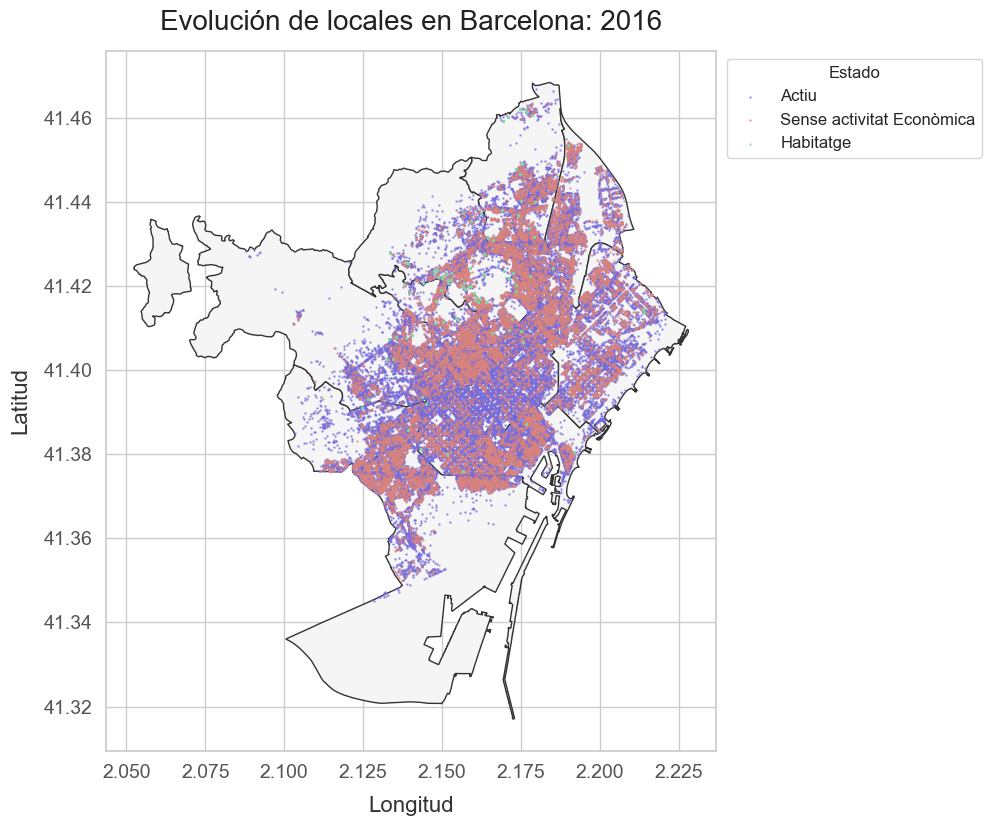

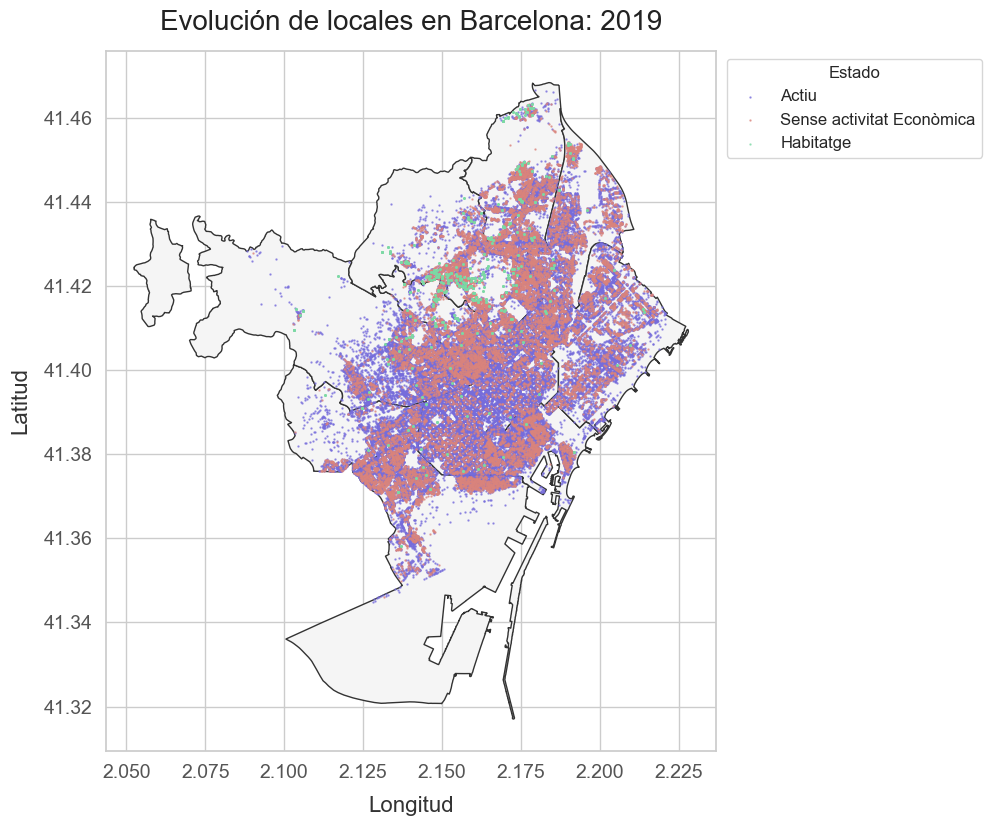

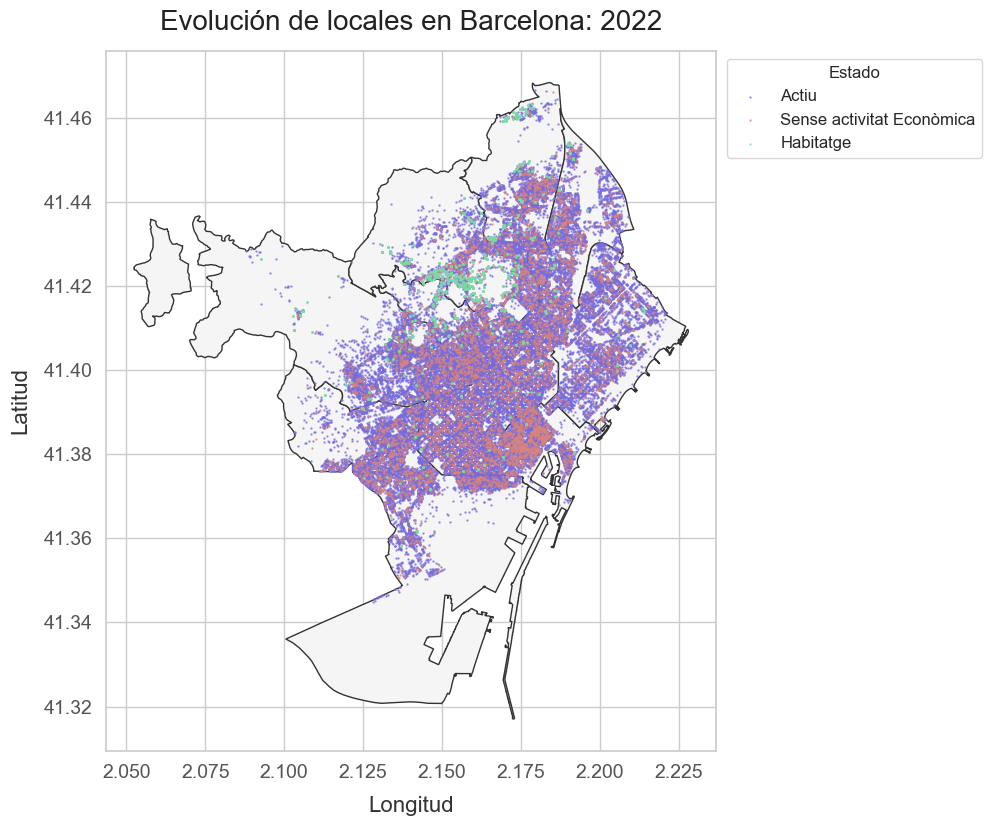

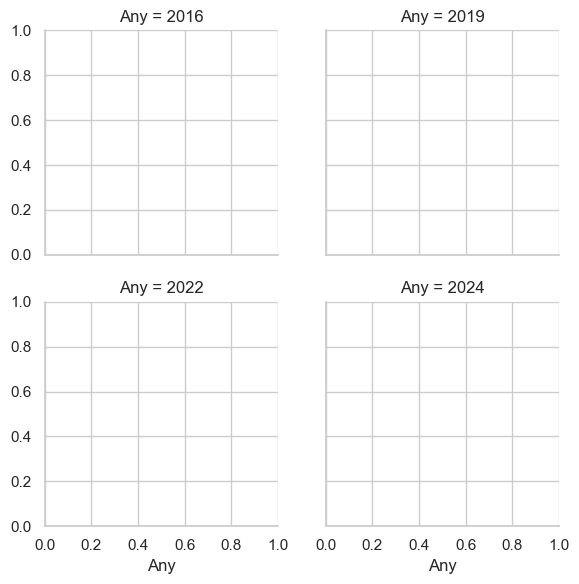

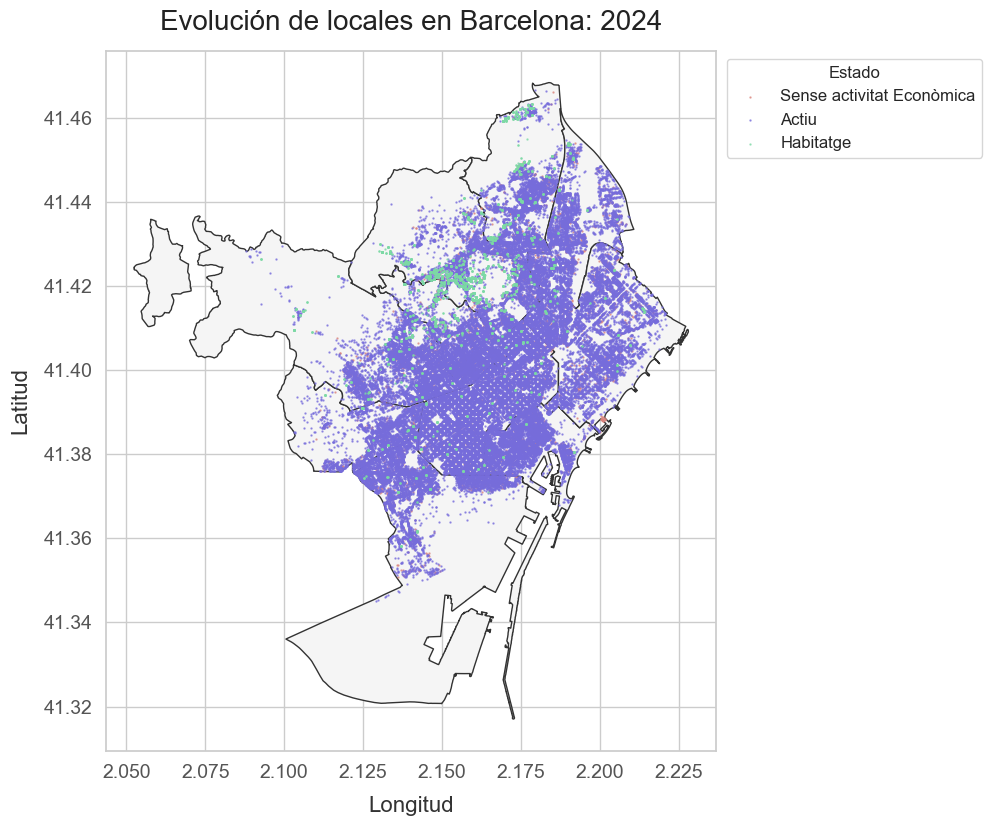

In [79]:
# Asegurarse de que ambos geodataframes tienen el mismo CRS
if censo_locales_viviendas_gdf.crs != df_districtes.crs:
    censo_locales_viviendas_gdf = censo_locales_viviendas_gdf.to_crs(df_districtes.crs)

# Función para generar el mapa para un año dado
def generar_mapa(any):
    censo_locales_viviendas_gdf_year = censo_locales_viviendas_gdf[censo_locales_viviendas_gdf['Any'] == any]

    fig, ax = plt.subplots(figsize=(12, 10))
    plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

    df_districtes.plot(ax=ax, color='whitesmoke', edgecolor='#333333', linewidth=1)

    if censo_locales_viviendas_gdf_year.empty:
        print("No hay datos para el año:", any)
        return fig, ax

    estados = censo_locales_viviendas_gdf_year['Nom_Principal_Activitat'].unique()
    colores = {'Actiu': '#766CDB', 'Sense activitat Econòmica': '#DA847C', 'Habitatge': '#7CD9A5'}

    for estado in estados:
        subset = censo_locales_viviendas_gdf_year[censo_locales_viviendas_gdf_year['Nom_Principal_Activitat'] == estado]
        ax.scatter(subset['Longitud'], subset['Latitud'],
                   label=estado,
                   color=colores.get(estado, '#52515E'),
                   s=0.5, alpha=0.7)

    ax.set_xlabel('Longitud', labelpad=10, fontsize=16, color='#333333')
    ax.set_ylabel('Latitud', labelpad=10, fontsize=16, color='#333333')
    ax.set_title('Evolución de locales en Barcelona: ' + str(any), pad=15, fontsize=20, color='#222222')
    ax.tick_params(labelsize=14, colors='#555555')
    ax.set_axisbelow(True)
    ax.legend(title='Estado', fontsize=12, title_fontsize=12, bbox_to_anchor=(.95, .5, 0.5, 0.5), frameon=True)

    return fig, ax

# Años a plotear
anos_plotear = [2016, 2019, 2022, 2024]

# Crear FacetGrid
g = sns.FacetGrid(data=pd.DataFrame({'Any': anos_plotear}), col='Any', col_wrap=2)

# Mapear la función generar_mapa a cada facet
g.map(lambda any, **kwargs: generar_mapa(any.iloc[0])[0], 'Any')

plt.show()

### Precios comercios



In [81]:

# Cargar todas las tablas de Excel de una carpeta
archivos = glob.glob(r"../Sprint 10/Precios locales comerciales/*.xlsx")  # Ajusta la ruta
dataframes = []

for archivo in archivos:
    df = pd.read_excel(archivo)
    df["Barrio"] = os.path.basename(archivo).replace(".xlsx", "").replace("_", "'")
    dataframes.append(df)

# Combinar en un único DataFrame
df_total = pd.concat(dataframes, ignore_index=True)

df_total


,Any,"Preus venda, mitjana €/m2","Preus lloguer, mitjana €/m2",Número total ofertes,Número total ofertes venda,Número total ofertes de lloguer,"Sostre total ofertat (m2), en milers","Superfície mitjana, noves (m2)","Superfície mitjana, baixa (m2)",< 250 m2,de 250 a 500 m2,de 500 a 1000 m2,de 1000 a 2500 m2,de 2500 a 5000 m2,> 5000 m2,"Mitjana d'antiguitat, dies",Barrio
0,2016,1034.07,7.93,254,110,158,30.042,85.00,57.83,227,21,5,1,0,0,-9.41,el Carmel
1,2017,1151.36,8.40,260,123,152,33.546,71.40,87.23,228,27,3,2,0,0,74.09,el Carmel
2,2018,1172.43,9.14,246,129,129,33.531,148.21,161.60,211,30,3,2,0,0,51.39,el Carmel
3,2019,1169.04,8.37,246,143,121,30.049,101.17,142.86,220,22,3,1,0,0,71.17,el Carmel
4,2020,1142.37,9.82,234,143,106,29.575,84.07,159.00,216,12,3,3,0,0,90.91,el Carmel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2020,1023.08,7.28,95,67,29,23.304,68.00,416.33,71,8,14,2,0,0,134.55,la Teixonera
707,2021,883.34,7.30,126,87,41,28.948,396.20,177.70,92,17,16,1,0,0,88.34,la Teixonera
708,2022,960.26,7.55,161,117,46,30.228,251.75,167.67,127,25,8,1,0,0,38.53,la Teixonera
709,2023,1100.12,8.40,161,113,49,25.630,198.33,154.23,134,18,9,0,0,0,84.50,la Teixonera


In [82]:
# Verificar y limpiar los datos
df_total = df_total.rename(columns={"Any": "Año", "Preus lloguer, mitjana €/m2": "Alquiler", "Preus venda, mitjana €/m2": "Venta"})
df_total = df_total.melt(id_vars=["Año", "Barrio"], value_vars=["Alquiler", "Venta"], var_name="Tipo", value_name="Precio")

df_total

,Año,Barrio,Tipo,Precio
0,2016,el Carmel,Alquiler,7.93
1,2017,el Carmel,Alquiler,8.40
2,2018,el Carmel,Alquiler,9.14
3,2019,el Carmel,Alquiler,8.37
4,2020,el Carmel,Alquiler,9.82
...,...,...,...,...
1417,2020,la Teixonera,Venta,1023.08
1418,2021,la Teixonera,Venta,883.34
1419,2022,la Teixonera,Venta,960.26
1420,2023,la Teixonera,Venta,1100.12


In [83]:
# Asignar distritos a barrios
mapa_distritos = {"Baró de Viver": "Sant Andreu", "Can Baró": "Horta-Guinardó", "Can Peguera": "Nou Barris",
                   "Canyelles": "Nou Barris", "Ciutat Meridiana": "Nou Barris", "Diagonal Mar - el Front Marítim de Poblenou": "Sant Martí", "el Baix Guinardó": "Horta-Guinardó", "el Barri Gòtic": "Ciutat Vella", "el Besòs - el Maresme": "Sant Martí", "el Bon Pastor": "Sant Andreu", "el Camp d'en Grassot - Gràcia Nova": "Gràcia", "el Camp de l'Arpa del Clot": "Sant Martí", "el Carmel": "Horta-Guinardó", "el Clot": "Sant Martí", "el Coll": "Gràcia", "el Congrés - els Indians": "Sant Andreu", "el Fort Pienc": "Eixample", "el Guinardó": "Horta-Guinardó", "el Parc - la Llacuna del Poblenou": "Sant Martí", "el Poble Sec - Parc Montjuïc": "Sants-Montjuïc", "el Poblenou": "Sant Martí", "el Putxet - el Farrò": "Sarrià-Sant Gervasi", "el Raval": "Ciutat Vella", "el Turó de la Peira": "Nou Barris", "Horta": "Horta-Guinardó", "Hostafrancs": "Sants-Montjuïc", "l'Antiga Esquerra de l'Eixample": "Eixample", "Canyelles": "Nou Barris", "la Bordeta": "Sants-Montjuïc", "la Clota": "Horta-Guinardó", "la Dreta de l'Eixample": "Eixample", "la Font d'en Fargues": "Nou Barris", "la Font de la Guatlla": "Sants-Montjuïc", "la Guineueta": "Nou Barris", "la Marina de Port": "Sants-Montjuïc", "la Marina del Prat Vermell - Zona Franca": "Sants-Montjuïc", "la Maternitat i San Ramon": "Les Corts",
                   "la Nova Esquerra de l'Eixample": "Eixample", "la Prosperitat": "Nou Barris", "la Sagrada Família": "Eixample", "la Sagrera": "Sant Andreu", "la Salut": "Gràcia", "la Teixonera": "Horta-Guinardó", "la Trinitat Nova": "Nou Barris", "la Trinitat Vella": "Sant Andreu", "la Vall d'Hebron": "Horta-Guinardó", "la Verneda - la Pau": "Sant Martí", "la Vila de Gràcia": "Gràcia", "la Vila Olímpica del Poblenou": "Sant Martí", "les Corts": "Les Corts", "les Roquetes": "Nou Barris", "les Tres Torres": "Sarrià-Sant Gervasi", "Montbau": "Horta-Guinardó", "Navas": "Sant Andreu", "Pedralbes": "Les Corts", "Porta": "Nou Barris", "Provençals del Poblenou": "Sant Martí", "Sant Andreu": "Sant Andreu", "Sant Antoni": "Eixample", "Sant Genís dels Agudells": "Horta-Guinardó", "Sant Gervasi - Bonanova": "Sarrià-Sant Gervasi", "Sant Gervasi - Galvany": "Sarrià-Sant Gervasi", "Sant Martí de Provençals": "Sant Martí", "Sant Pere - Santa Caterina - la Ribera": "Ciutat Vella", "Sants - Badal": "Sants-Montjuïc", "Sants": "Sants-Montjuïc", "Sarrià": "Sarrià-Sant Gervasi", "Torre Baró": "Nou Barris", "Vallbona": "Nou Barris", "Vallcarca - els Penitents": "Gràcia", "Vallvidrera - el Tibidabo - les Planes": "Sarrià-Sant Gervasi", "Verdun": "Nou Barris", "Vilapicina - la Torre Llobeta": "Nou Barris"}  # Completa con los nombres reales
df_total["Distrito"] = df_total["Barrio"].map(mapa_distritos)

In [84]:
df_total.to_csv(r'../Sprint 10/Datos exportados/df_precios_locales_distritos.csv')

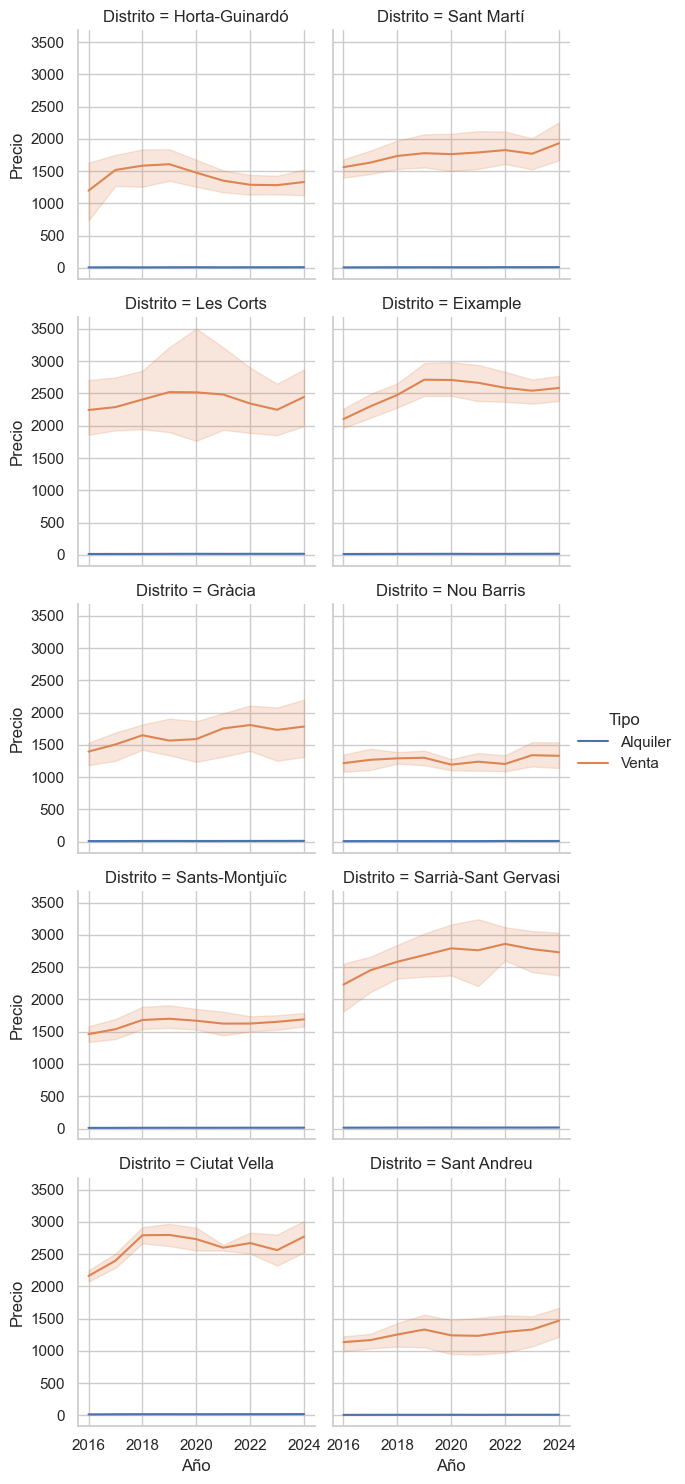

In [86]:

# Graficar usando FacetGrid
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df_total, col="Distrito", hue="Tipo", col_wrap=2, sharey=True)
g.map(sns.lineplot, "Año", "Precio").add_legend()

plt.show()

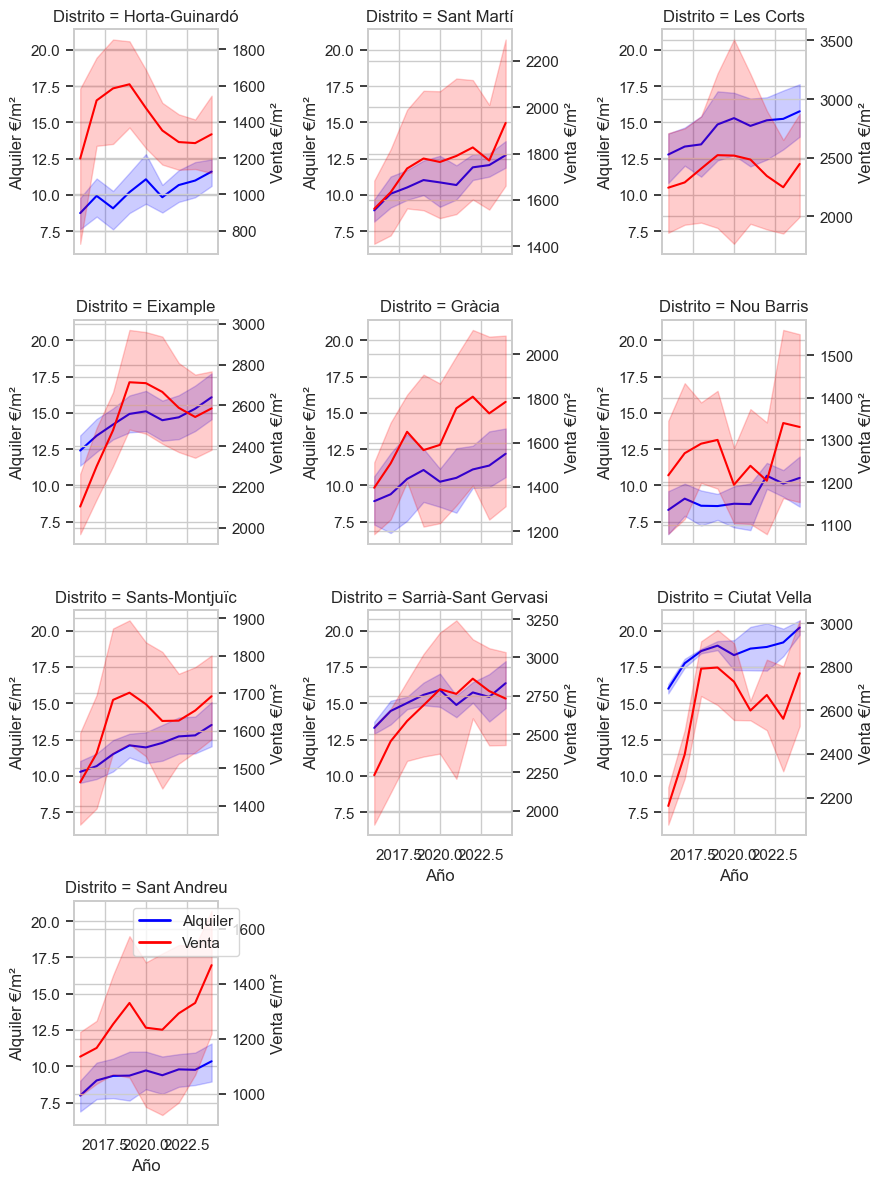

In [87]:
g = sns.FacetGrid(df_total, col="Distrito", col_wrap=3, sharex=True, despine=False)

# Función para graficar con doble eje y
def dual_axis_plot(data, color, **kwargs):
    ax = plt.gca()
    ax2 = ax.twinx()  # Crear segundo eje y

    # Graficar alquiler en el eje principal
    sns.lineplot(data=data[data["Tipo"] == "Alquiler"], x="Año", y="Precio", color="blue", ax=ax, label="Alquiler")

    # Graficar venta en el eje secundario
    sns.lineplot(data=data[data["Tipo"] == "Venta"], x="Año", y="Precio", color="red", ax=ax2, label="Venta")

    ax.set_ylabel("Alquiler €/m²")
    ax2.set_ylabel("Venta €/m²")
    
    # Evitar superposición de leyendas
    ax.get_legend().remove()
    ax2.get_legend().remove()

# Aplicar la función personalizada a cada gráfico
g.map_dataframe(dual_axis_plot)

# Agregar leyenda de forma manual
plt.legend(handles=[
    plt.Line2D([0], [0], color="blue", lw=2, label="Alquiler"),
    plt.Line2D([0], [0], color="red", lw=2, label="Venta")
], loc="upper right", bbox_to_anchor=(1.2, 1))

plt.show()


###Evolución tejido comercial

In [ ]:
# pip install squarify

In [88]:
import squarify

<div style="color:red; background:lightgrey">
<code>
# Unificar ese Engròs</code>
</div>

In [89]:
df_locales_2016_2024_gdf.loc[df_locales_2016_2024_gdf['Nom_Principal_Activitat'] == 'Actiu']['Nom_Sector_Activitat'].unique()

array(['Serveis', 'Altres', 'Comerç al detall',
       'Comerç al detall /Engròs'], dtype=object)

In [90]:
df_locales_2016_2024_gdf.loc[df_locales_2016_2024_gdf['Nom_Principal_Activitat'] == 'Actiu']['Nom_Grup_Activitat'].unique()

array(['Altres',
       'Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)',
       'Sanitat i assistència', 'Quotidià no alimentari',
       'Quotidià alimentari', 'Ensenyament', 'Finances i assegurances',
       'Parament de la llar', 'Activitats immobiliàries',
       'Equipaments culturals i recreatius', 'Equipament personal',
       'Oci i cultura', 'Reparacions (Electrodomèstics i automòbils)',
       'Automoció', 'Manteniment, neteja i producció'], dtype=object)

In [92]:
df_locales_2016_2024_gdf_agrupados = df_locales_2016_2024_gdf.groupby(['Any', 'Nom_Principal_Activitat', 'Nom_Sector_Activitat', 'Nom_Grup_Activitat', 'Nom_Districte']).size().reset_index()
df_locales_2016_2024_gdf_agrupados

,Any,Nom_Principal_Activitat,Nom_Sector_Activitat,Nom_Grup_Activitat,Nom_Districte,0
0,2016,Actiu,Altres,Altres,Ciutat Vella,388
1,2016,Actiu,Altres,Altres,Eixample,827
2,2016,Actiu,Altres,Altres,Gràcia,541
3,2016,Actiu,Altres,Altres,Horta-Guinardó,463
4,2016,Actiu,Altres,Altres,Les Corts,249
...,...,...,...,...,...,...
872,2024,Sense activitat Econòmica,Locals buits en venda i lloguer,Grup no definit,Nou Barris,225
873,2024,Sense activitat Econòmica,Locals buits en venda i lloguer,Grup no definit,Sant Andreu,218
874,2024,Sense activitat Econòmica,Locals buits en venda i lloguer,Grup no definit,Sant Martí,340
875,2024,Sense activitat Econòmica,Locals buits en venda i lloguer,Grup no definit,Sants-Montjuïc,321


In [93]:
df_locales_2016_2024_gdf_agrupados.to_csv(r'../Sprint 10/Datos exportados/df_sectores_comerciales_distrito_año.csv')

### Censo habitantes por nacionalidad

In [94]:
censo_habitantes_2016 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2016_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2017 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2017_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2018 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2018_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2019 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2019_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2020 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2020_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2021 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2021_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2022 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2022_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2023 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2023_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
censo_habitantes_2024 = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/2024_pad_mdbas_nacionalitat-pais_nacionalitat-continent_sexe.csv')
tabla_dimensiones_censo = pd.read_csv(r'../Sprint 10/Censo habitantes por nacionalidad/pad_dimensions.csv')

In [95]:
censo_habitantes_2016.head()

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor,NACIONALITAT_PAIS,NACIONALITAT_CONTINENT,SEXE
0,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,15,4,1
1,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,22,4,1
2,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,32,4,1
3,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,32,4,2
4,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,329,58,4,1


In [96]:
lista_censo_habitantes = [censo_habitantes_2016,censo_habitantes_2017,censo_habitantes_2018,censo_habitantes_2019,censo_habitantes_2020,censo_habitantes_2021,censo_habitantes_2022,censo_habitantes_2023,censo_habitantes_2024]
censo_habitantes = pd.concat(lista_censo_habitantes, ignore_index=True)

In [97]:
censo_habitantes.head()

,Data_Referencia,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,AEB,Seccio_Censal,Valor,NACIONALITAT_PAIS,NACIONALITAT_CONTINENT,SEXE
0,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,15,4,1
1,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,22,4,1
2,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,32,4,1
3,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,..,32,4,2
4,2016-01-01,1,Ciutat Vella,1,el Raval,1,1001,329,58,4,1


In [98]:
censo_habitantes.isnull().sum()

Data_Referencia           0
Codi_Districte            0
Nom_Districte             0
Codi_Barri                0
Nom_Barri                 0
AEB                       0
Seccio_Censal             0
Valor                     0
NACIONALITAT_PAIS         0
NACIONALITAT_CONTINENT    0
SEXE                      0
dtype: int64

In [99]:
censo_habitantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701505 entries, 0 to 701504
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Data_Referencia         701505 non-null  object
 1   Codi_Districte          701505 non-null  int64 
 2   Nom_Districte           701505 non-null  object
 3   Codi_Barri              701505 non-null  int64 
 4   Nom_Barri               701505 non-null  object
 5   AEB                     701505 non-null  int64 
 6   Seccio_Censal           701505 non-null  int64 
 7   Valor                   701505 non-null  object
 8   NACIONALITAT_PAIS       701505 non-null  int64 
 9   NACIONALITAT_CONTINENT  701505 non-null  int64 
 10  SEXE                    701505 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 58.9+ MB


In [100]:
censo_habitantes.Valor.replace('..','0', inplace=True)
censo_habitantes['Valor'] = censo_habitantes['Valor'].astype(int)

/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1801/3640343913.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  censo_habitantes.Valor.replace('..','0', inplace=True)


In [101]:
censo_habitantes_agrupado = censo_habitantes.groupby(['Data_Referencia', 'Nom_Districte', 'NACIONALITAT_PAIS'])['Valor'].sum().reset_index()
censo_habitantes_agrupado

,Data_Referencia,Nom_Districte,NACIONALITAT_PAIS,Valor
0,2016-01-01,Ciutat Vella,1,30
1,2016-01-01,Ciutat Vella,3,0
2,2016-01-01,Ciutat Vella,4,1188
3,2016-01-01,Ciutat Vella,5,277
4,2016-01-01,Ciutat Vella,6,0
...,...,...,...,...
12801,2024-01-01,Sarrià-Sant Gervasi,234,651
12802,2024-01-01,Sarrià-Sant Gervasi,235,0
12803,2024-01-01,Sarrià-Sant Gervasi,236,0
12804,2024-01-01,Sarrià-Sant Gervasi,237,0


In [102]:
censo_habitantes_agrupado.rename(columns={'NACIONALITAT_PAIS':'Codi_Valor'}, inplace=True)

In [103]:
nacionalidad = tabla_dimensiones_censo.loc[tabla_dimensiones_censo['Codi_Dimensio'] == 11, ['Codi_Valor','Desc_Valor_CA']]
nacionalidad

,Codi_Valor,Desc_Valor_CA
220,1,Afganistan
221,2,Aland
222,3,Albània
223,4,Alemanya
224,5,Algèria
...,...,...
453,234,Xina
454,235,Xipre
455,236,Zàmbia
456,237,Zimbàbue


In [104]:
censo_habitantes_agrupado = pd.merge(censo_habitantes_agrupado,nacionalidad, on='Codi_Valor', how='inner')

In [105]:
censo_habitantes_agrupado.to_csv('censo_habitantes_nacionalidad_distrito.csv')

### Valores socioeconómicos

In [110]:
df_valores_socioeconomicos = pd.read_csv(r'../Sprint 10/Valores socioeconomicos/Valores socioeconomicos.csv', delimiter=';')
df_valores_socioeconomicos['Total'] = df_valores_socioeconomicos['Total']*1000
df_valores_socioeconomicos['Total'] = df_valores_socioeconomicos['Total'].astype(int)

In [ ]:
df_valores_socioeconomicos

,Distritos,Indicadores de renta media y mediana,Periodo,Total
0,Ciutat Vella,Renta neta media por persona,2022,12855
1,Ciutat Vella,Renta neta media por persona,2021,11931
2,Ciutat Vella,Renta neta media por persona,2020,11154
3,Ciutat Vella,Renta neta media por persona,2019,11552
4,Ciutat Vella,Renta neta media por persona,2018,11062
...,...,...,...,...
475,Sant Martí,Renta bruta media por hogar,2019,47174
476,Sant Martí,Renta bruta media por hogar,2018,45240
477,Sant Martí,Renta bruta media por hogar,2017,43492
478,Sant Martí,Renta bruta media por hogar,2016,42572


In [111]:
df_valores_socioeconomicos.to_csv(r'../Sprint 10/Datos exportados/df_valores_socioeconomicos.csv')

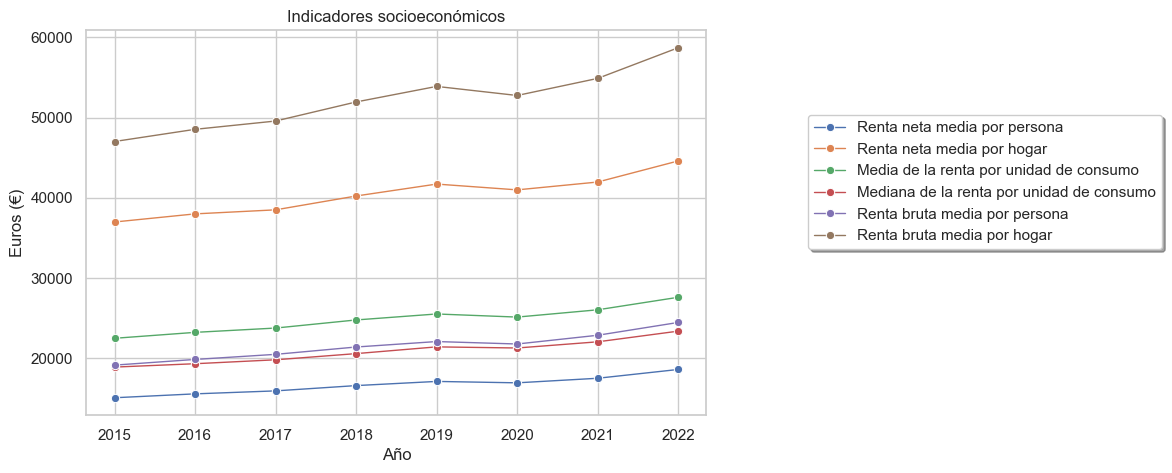

In [114]:
# Configurar de nuevo estilo de seaborn
sns.set_theme(style="whitegrid") 

# Crear gráfica de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_valores_socioeconomicos, x='Periodo', y='Total', hue='Indicadores de renta media y mediana', marker='o', linewidth=1, errorbar=None)

# Personalizar la gráfica
plt.title("Indicadores socioeconómicos")
plt.xlabel("Año")
plt.ylabel("Euros (€)")
# plt.xticks(valores_socioeconomicos['Periodo'])
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)


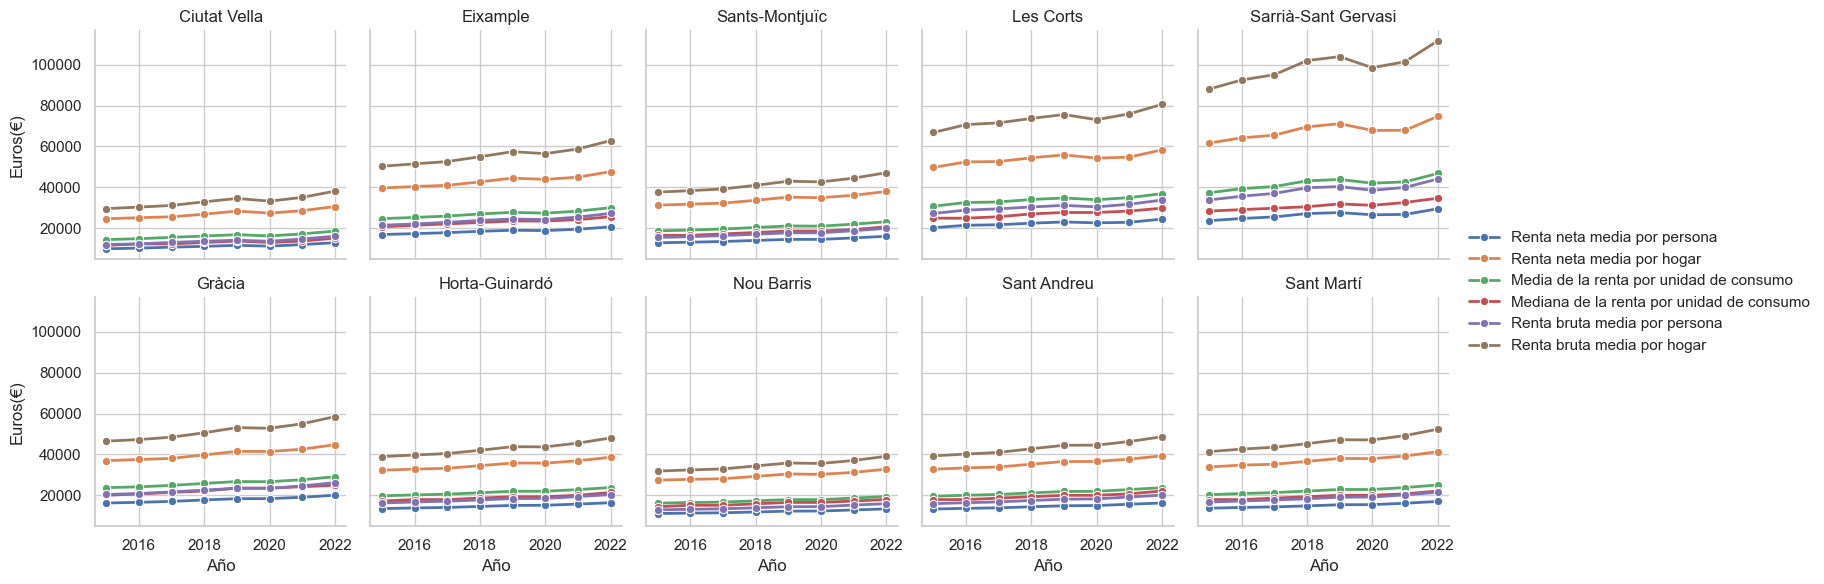

In [115]:
# Crear FacetGrid con una gráfica por distrito
g = sns.FacetGrid(df_valores_socioeconomicos, col='Distritos', col_wrap=5, sharey=True)

# Dibujar una línea en cada gráfico
g.map(sns.lineplot, 'Periodo', 'Total', 'Indicadores de renta media y mediana', marker='o', linewidth=2)

# Ajustar título y ejes
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Año', 'Euros(€)')

# Añadir leyenda fuera de las gráficas individuales
g.add_legend()

### Precios compra

In [116]:
precio_compra = pd.read_csv(r'../Sprint 10/Precios vivienda/Taula estadística compravenda.csv', delimiter=';')
precio_compra


,Año,Barcelona,Ciutat Vella,Eixample,Sants-Montjuïc,Les Corts,Sarrià-Sant Gervasi,Gràcia,Horta-Guinardó,Nou Barris,Sant Martí
0,2014,2754.46,2674.20,3156.31,1993.62,3351.37,3553.26,2816.74,2022.70,1613.77,2737.80
1,2015,2970.55,3075.69,3396.80,2335.09,3614.93,3941.48,3057.07,2250.76,1698.49,2895.03
2,2016,3238.16,3644.73,3530.01,2482.17,3710.69,4373.83,3538.49,2357.16,1811.88,3190.38
3,2017,3745.87,4236.93,4333.44,3465.62,4750.35,5061.66,4076.50,2696.64,2121.55,3619.80
4,2018,3995.29,4638.20,4403.13,3499.80,4611.71,5450.87,4353.94,3041.43,2279.73,3775.81
5,2019,4127.15,4339.26,4762.89,3717.57,5037.50,5365.24,4561.08,3126.42,2502.17,3894.73
6,2020,4170.39,4201.60,4791.25,3640.85,5142.93,5386.46,4397.94,3153.03,2462.89,3916.14
7,2021,4119.82,3816.89,4645.75,3803.76,4820.70,6063.34,4205.66,2954.61,2627.23,3764.05
8,2022,4380.37,4140.71,4978.94,3623.28,4869.05,6085.62,4562.00,3354.31,2561.15,4280.64
9,2023,4370.96,4170.41,5108.05,3737.77,5045.51,5975.31,4656.44,3324.59,2658.17,4212.99


In [117]:
# Remodelar el DataFrame
precio_compra_melted = pd.melt(precio_compra, id_vars=['Año'], var_name='Distrito', value_name='Precio_m2')

In [118]:
precio_compra_melted

,Año,Distrito,Precio_m2
0,2014,Barcelona,2754.46
1,2015,Barcelona,2970.55
2,2016,Barcelona,3238.16
3,2017,Barcelona,3745.87
4,2018,Barcelona,3995.29
...,...,...,...
105,2020,Sant Martí,3916.14
106,2021,Sant Martí,3764.05
107,2022,Sant Martí,4280.64
108,2023,Sant Martí,4212.99


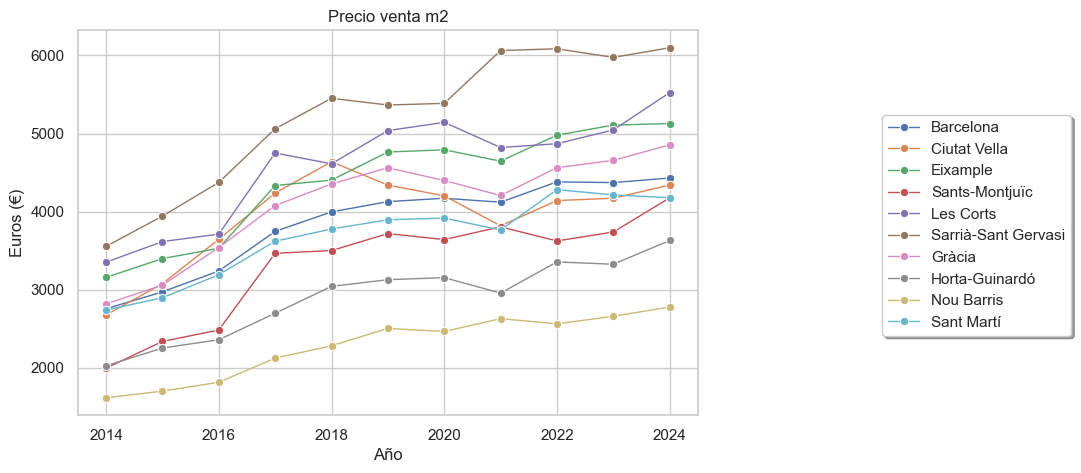

In [119]:
# Crear gráfica de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=precio_compra_melted, x='Año', y='Precio_m2', hue='Distrito', marker='o', linewidth=1)

# Personalizar la gráfica
plt.title("Precio venta m2")
plt.xlabel("Año")
plt.ylabel("Euros (€)")
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)

### Precios alquileres

In [120]:
precio_alquiler = pd.read_csv(r'../Sprint 10/Precios vivienda/Taula estadística lloguer.csv')
precio_alquiler


,Año,Barcelona,Ciutat Vella,Eixample,Sants-Montjuïc,Les Corts,Sarrià-Sant Gervasi,Gràcia,Horta-Guinardó,Nou Barris,Sant Martí
0,2000,6.00,5.53,5.75,6.05,7.59,7.40,6.32,5.75,5.41,5.74
1,2001,6.87,6.43,6.81,6.68,8.64,8.24,7.04,6.45,6.25,6.50
2,2002,7.62,7.29,7.47,7.51,8.90,9.06,8.08,7.09,7.15,7.47
3,2003,8.00,7.59,7.88,7.77,9.34,9.35,8.41,7.65,7.28,7.65
4,2004,8.68,8.56,8.45,8.68,9.96,10.00,9.27,8.28,7.94,8.20
5,2005,9.64,9.76,9.49,9.51,10.78,10.85,10.18,9.18,8.88,9.20
6,2006,10.56,10.69,10.26,10.49,11.85,11.63,11.26,10.18,9.94,10.35
7,2007,11.54,11.60,11.26,11.28,13.01,12.71,12.45,11.08,10.83,11.21
8,2008,12.24,12.57,11.89,12.22,13.38,13.29,13.02,12.04,11.48,11.84
9,2009,11.92,12.42,11.64,11.91,12.91,12.85,12.81,11.39,11.17,11.59


In [121]:
# Remodelar el DataFrame
precio_alquiler_melted = pd.melt(precio_alquiler, id_vars=['Año'], var_name='Distrito', value_name='Precio_m2')
precio_alquiler_melted

,Año,Distrito,Precio_m2
0,2000,Barcelona,6.00
1,2001,Barcelona,6.87
2,2002,Barcelona,7.62
3,2003,Barcelona,8.00
4,2004,Barcelona,8.68
...,...,...,...
245,2020,Sant Martí,13.79
246,2021,Sant Martí,13.31
247,2022,Sant Martí,14.49
248,2023,Sant Martí,16.18


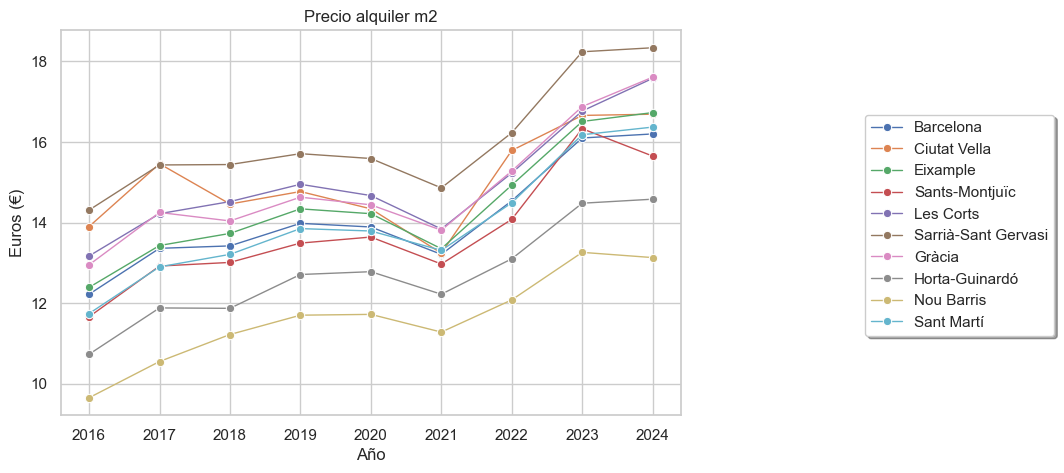

In [122]:
# Crear gráfica de líneas
plt.figure(figsize=(8, 5))
sns.lineplot(data=precio_alquiler_melted[precio_alquiler_melted['Año']>=2016], x='Año', y='Precio_m2', hue='Distrito', marker='o', linewidth=1)

# Personalizar la gráfica
plt.title("Precio alquiler m2")
plt.xlabel("Año")
plt.ylabel("Euros (€)")
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)